In [1]:
!pip install einops
!pip install torchmetrics
!pip install livelossplot
!pip install pybedtools
!pip install Bio
!pip install Sophia-Optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 77.0 MB/s eta 0:00:00
  Created wheel for pybedtools: filename=pybedtools-0.9.1-cp310-cp310-linux_x86_64.whl size=13997649 sha256=51092d83b0e3219298bac74c72726349f485286570ba57ee9af0f42fdb4d2ceb
  Stored in directory: /root/.cache/pip/wheels/f5/79/76/c2cef660013cdf573214696aec4bc7ec352bf46141682230af
Successfully built pybedtools
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.4/279.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.3 MB/s eta 0:00:00

In [2]:
!nvidia-smi

Wed Dec 13 10:54:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install memory_efficient_attention_pytorch

In [5]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 7.7 MB/s eta 0:00:00


# Import

In [6]:
import os

os.getpid()
from functools import partial
from scipy.stats import zscore
import torch
import copy
import itertools
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
from IPython.display import display
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from torch.nn.modules.activation import ReLU
from torch.optim import Adam
from tqdm import tqdm_notebook
from torchvision.utils import save_image
import matplotlib
import math
from inspect import isfunction
from functools import partial
import scipy
from scipy.special import rel_entr
from torch import nn, einsum
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from einops import rearrange
from torch import nn, einsum
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
import matplotlib.animation as animation
import matplotlib.image as mpimg
import glob
from PIL import Image
from typing import List, Union
from torchmetrics.functional import kl_divergence
import random
import gc
from livelossplot import PlotLosses
from Bio import SeqIO
import pandas as pd
import math
import torch
from torch import Tensor
from torch.optim.optimizer import Optimizer
from memory_efficient_attention_pytorch import Attention
from accelerate import Accelerator
from typing import List, Optional
%matplotlib inline

# Optimizer

In [7]:
class SophiaG(Optimizer):
    """
    SophiaG optimizer class.
    """
    def __init__(self, params, lr=5e-2, betas=(0.965, 0.99), rho = 0.04,
         weight_decay=1e-1, *, maximize: bool = False,
         capturable: bool = False, dynamic: bool = False):
        """
        Initialize the optimizer.
        """
        if not 0.0 <= lr:
            raise ValueError(f"Invalid learning rate: {lr}")
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError(f"Invalid beta parameter at index 0: {betas[0]}")
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError(f"Invalid beta parameter at index 1: {betas[1]}")
        if not 0.0 <= rho:
            raise ValueError(f"Invalid rho parameter at index 1: {rho}")
        if not 0.0 <= weight_decay:
            raise ValueError(f"Invalid weight_decay value: {weight_decay}")
        defaults = dict(lr=lr, betas=betas, rho=rho,
                        weight_decay=weight_decay,
                        maximize=maximize, capturable=capturable, dynamic=dynamic)
        super(SophiaG, self).__init__(params, defaults)

    def __setstate__(self, state):
        """
        Set the state of the optimizer.
        """
        super().__setstate__(state)
        for group in self.param_groups:
            group.setdefault('maximize', False)
            group.setdefault('capturable', False)
            group.setdefault('dynamic', False)
        state_values = list(self.state.values())
        step_is_tensor = (len(state_values) != 0) and torch.is_tensor(state_values[0]['step'])
        if not step_is_tensor:
            for s in state_values:
                s['step'] = torch.tensor(float(s['step']))

    @torch.no_grad()
    def update_hessian(self):
        """
        Update the hessian.
        """
        for group in self.param_groups:
            beta1, beta2 = group['betas']
            for p in group['params']:
                if p.grad is None:
                    continue
                state = self.state[p]

                if len(state) == 0:
                    state['step'] = torch.zeros((1,), dtype=torch.float, device=p.device) \
                        if self.defaults['capturable'] else torch.tensor(0.)
                    state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    state['hessian'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                if 'hessian' not in state.keys():
                    state['hessian'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                state['hessian'].mul_(beta2).addcmul_(p.grad, p.grad, value=1 - beta2)

    @torch.no_grad()
    def update_exp_avg(self):
        """
        Update the exponential average.
        """
        for group in self.param_groups:
            beta1, beta2 = group['betas']
            for p in group['params']:
                if p.grad is None:
                    continue
                state = self.state[p]
                state['exp_avg'].mul_(beta1).add_(p.grad, alpha=1 - beta1)

    @torch.no_grad()
    def step(self, closure=None, bs=5120):
        """
        Perform a step of the optimizer.
        """
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        self.update_hessian()
        self.update_exp_avg()

        for group in self.param_groups:
            params_with_grad = []
            grads = []
            exp_avgs = []
            state_steps = []
            hessian = []
            beta1, beta2 = group['betas']

            for p in group['params']:
                if p.grad is None:
                    continue
                params_with_grad.append(p)

                if p.grad.is_sparse:
                    raise RuntimeError('Hero does not support sparse gradients')
                grads.append(p.grad)
                state = self.state[p]
                # State initialization
                if len(state) == 0:
                    state['step'] = torch.zeros((1,), dtype=torch.float, device=p.device) \
                        if self.defaults['capturable'] else torch.tensor(0.)
                    state['exp_avg'] = torch.zeros_like(p, memory_format=torch.preserve_format)
                    state['hessian'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                if 'hessian' not in state.keys():
                    state['hessian'] = torch.zeros_like(p, memory_format=torch.preserve_format)

                exp_avgs.append(state['exp_avg'])
                state_steps.append(state['step'])
                hessian.append(state['hessian'])

                if self.defaults['capturable']:
                    bs = torch.ones((1,), dtype=torch.float, device=p.device) * bs

            self._sophiag(params_with_grad,
                  grads,
                  exp_avgs,
                  hessian,
                  state_steps,
                  bs=bs,
                  beta1=beta1,
                  beta2=beta2,
                  rho=group['rho'],
                  lr=group['lr'],
                  weight_decay=group['weight_decay'],
                  maximize=group['maximize'],
                  capturable=group['capturable'])

        return loss

    def _sophiag(self, params: List[Tensor],
          grads: List[Tensor],
          exp_avgs: List[Tensor],
          hessian: List[Tensor],
          state_steps: List[Tensor],
          capturable: bool = False,
          *,
          bs: int,
          beta1: float,
          beta2: float,
          rho: float,
          lr: float,
          weight_decay: float,
          maximize: bool):
        """
        SophiaG function.
        """
        if not all(isinstance(t, torch.Tensor) for t in state_steps):
            raise RuntimeError("API has changed, `state_steps` argument must contain a list of singleton tensors")

        self._single_tensor_sophiag(params,
             grads,
             exp_avgs,
             hessian,
             state_steps,
             bs=bs,
             beta1=beta1,
             beta2=beta2,
             rho=rho,
             lr=lr,
             weight_decay=weight_decay,
             maximize=maximize,
             capturable=capturable)

    def _single_tensor_sophiag(self, params: List[Tensor],
                         grads: List[Tensor],
                         exp_avgs: List[Tensor],
                         hessian: List[Tensor],
                         state_steps: List[Tensor],
                         *,
                         bs: int,
                         beta1: float,
                         beta2: float,
                         rho: float,
                         lr: float,
                         weight_decay: float,
                         maximize: bool,
                         capturable: bool):
        """
        SophiaG function for single tensor.
        """
        for i, param in enumerate(params):
            grad = grads[i] if not maximize else -grads[i]
            exp_avg = exp_avgs[i]
            hess = hessian[i]
            step_t = state_steps[i]

            if capturable:
                assert param.is_cuda and step_t.is_cuda and bs.is_cuda

            if torch.is_complex(param):
                grad = torch.view_as_real(grad)
                exp_avg = torch.view_as_real(exp_avg)
                hess = torch.view_as_real(hess)
                param = torch.view_as_real(param)

            # update step
            step_t += 1

            # Perform stepweight decay
            param.mul_(1 - lr * weight_decay)

            # Decay the first and second moment running average coefficient
            exp_avg.mul_(beta1).add_(grad, alpha=1 - beta1)

            if capturable:
                step = step_t
                step_size = lr
                step_size_neg = step_size.neg()

                ratio = (exp_avg.abs() / (rho * bs * hess + 1e-15)).clamp(None,1)
                param.addcmul_(exp_avg.sign(), ratio, value=step_size_neg)
            else:
                step = step_t.item()
                step_size_neg = - lr

                ratio = (exp_avg.abs() / (rho * bs * hess + 1e-15)).clamp(None,1)
                param.addcmul_(exp_avg.sign(), ratio, value=step_size_neg)

#Params

### Params


In [8]:
GLOBAL_SEED = 42
NUCLEOTIDES = ['A', 'C', 'T', 'G']
N_SAMPLES = 1000
EPOCHS = 10000
SAVE_AND_SAMPLE_EVERY = 5
IMAGE_SIZE = 200
CHANNELS = 1
LEARNING_RATE = 1e-3
TIMESTEPS = 50
RESNET_BLOCK_GROUPS = 4
# BATCH_SIZE = 16
BATCH_SIZE = 32
TOTAL_CLASS_NUMBER = 2

new params

In [9]:
GLOBAL_SEED = 42
NUCLEOTIDES = ['A', 'C', 'T', 'G']
N_SAMPLES = 1000
EPOCHS = 10000
SAVE_AND_SAMPLE_EVERY = 5
IMAGE_SIZE = 200
CHANNELS = 1
LEARNING_RATE =1e-5
TIMESTEPS = 50
RESNET_BLOCK_GROUPS = 4
# BATCH_SIZE = 16
BATCH_SIZE = 16
TOTAL_CLASS_NUMBER = 2

In [61]:
GLOBAL_SEED = 42
NUCLEOTIDES = ['A', 'C', 'T', 'G']
N_SAMPLES = 1000
EPOCHS = 10000
SAVE_AND_SAMPLE_EVERY = 5
IMAGE_SIZE = 300
CHANNELS = 1
LEARNING_RATE =1e-5
TIMESTEPS = 100
RESNET_BLOCK_GROUPS = 4
# BATCH_SIZE = 16
BATCH_SIZE = 16
TOTAL_CLASS_NUMBER = 2
# gradient_accumulation_steps = 4
gradient_accumulation_steps = 8

In [11]:
codes = {
 'A': [1., 0., 0., 0., 0.],
 'T': [0., 1., 0., 0., 0.],
 'G': [0., 0., 1., 0., 0.],
 'C': [0., 0., 0., 1., 0.],
 'N': [0., 0., 0., 0., 1.],
 }

#Functions

In [12]:
def seed_everything(seed=GLOBAL_SEED):
    """ "
    Seed everything.
    """
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

In [13]:
def one_hot_encode(seq, nucleotides, max_seq_len):
    """
    One-hot encode a sequence of nucleotides.
    """
    seq_len = len(seq)
    seq_array = np.zeros((max_seq_len, len(nucleotides)))
    for i in range(seq_len):
        seq_array[i, nucleotides.index(seq[i])] = 1
    return seq_array

In [14]:
def log(t, eps=1e-20):
    """
    Toch log for the purporses of diffusion time steps t.
    """
    return torch.log(t.clamp(min=eps))

In [15]:
class EMA:
    def __init__(self, beta):
        super().__init__()
        self.beta = beta
        self.step = 0

    def update_model_average(self, ma_model, current_model):
        for current_params, ma_params in zip(current_model.parameters(), ma_model.parameters()):
            old_weight, up_weight = ma_params.data, current_params.data
            ma_params.data = self.update_average(old_weight, up_weight)

    def update_average(self, old, new):
        if old is None:
            return new
        return old * self.beta + (1 - self.beta) * new

    def step_ema(self, ema_model, model, step_start_ema=2000):
        if self.step < step_start_ema:
            self.reset_parameters(ema_model, model)
            self.step += 1
            return
        self.update_model_average(ema_model, model)
        self.step += 1

    def reset_parameters(self, ema_model, model):
        ema_model.load_state_dict(model.state_dict())

In [16]:
def exists(x):
    return x is not None

In [17]:
def default(val, d):
    if exists(val):
        return val
    return d() if callable(d) else d

In [18]:
def cycle(dl):
    while True:
        for data in dl:
            yield data

In [19]:
def has_int_squareroot(num):
    return (math.sqrt(num) ** 2) == num

In [20]:
def num_to_groups(num, divisor):
    groups = num // divisor
    remainder = num % divisor
    arr = [divisor] * groups
    if remainder > 0:
        arr.append(remainder)
    return arr

In [21]:
def convert_image_to(img_type, image):
    if image.mode != img_type:
        return image.convert(img_type)
    return image

In [22]:
def l2norm(t):
    return F.normalize(t, dim=-1)

In [23]:
def sampling_reverse_encoding(number_of_samples, specific_group=False, group_number=None, cond_weight_to_metric=0):
    """
    Stands for reverse encoding

    """
    final_sequences = []
    for n_a in tqdm_notebook(range(number_of_samples)):
        sample_bs = 10
        if specific_group:
            sampled = torch.from_numpy(np.array([group_number] * sample_bs))
            print('specific')
        else:
            sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))

        random_classes = sampled.float().cuda()
        sampled_images = sample(
            model,
            classes=random_classes,
            image_size=IMAGE_SIZE,
            batch_size=sample_bs,
            channels=1,
            cond_weight=cond_weight_to_metric,
        )
        for n_b, x in enumerate(sampled_images[-1]):
            seq_final = f'>seq_test_{n_a}_{n_b}\n' + ''.join(
                [NUCLEOTIDES[s] for s in np.argmax(x.reshape(4, 200), axis=0)]
            )
            final_sequences.append(seq_final)

    save_motifs_syn = open('synthetic_seqs.fasta', 'w')

    save_motifs_syn.write('\n'.join(final_sequences))
    save_motifs_syn.close()

# Data import and preperation

In [24]:
class SequenceDataset(Dataset):
    'Characterizes a dataset for PyTorch'

    def __init__(self, seqs, c, transform=None):
        'Initialization'
        self.seqs = seqs
        self.c = c
        self.transform = transform

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.seqs)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        image = self.seqs[index]

        x = self.transform(image)

        y = self.c[index]

        return x, y

In [25]:
seed_everything()

In [26]:
# # Read and visualize .bed file
# pos_df = pd.read_csv('GSE107690_K562_High_confidence_peaks.bed',
#  sep='\t', comment='t', header=None)
# header = ['chrom', 'chromStart', 'chromEnd']
# pos_df.columns = header[:len(pos_df.columns)]
# pos_df['len'] = pos_df.chromEnd - pos_df.chromStart
# pos_df.head()
# plt.hist(pos_df.chrom, bins=len(pos_df.chrom.unique()))
# pos_df.len.quantile(0.5)
# pos_df.len[pos_df.len > 512].count()
# pos_df.len[pos_df.len <= 512].count() / pos_df.len.count()
# pos_df.len.hist(bins=100)

In [27]:
# quad_len = 512
# pos_df_filter = pos_df[pos_df.len
#  <= quad_len].copy().reset_index(drop=True)
# pos_df_filter.len.max()
# pos_df_filter['add_len'] = quad_len - pos_df_filter.len
# pos_df_filter['left_add_len'] = (pos_df_filter.add_len
#  / 2).astype('int64')
# pos_df_filter['right_add_len'] = pos_df_filter.add_len \
#  - pos_df_filter.left_add_len
# pos_df_filter['new_chromStart'] = pos_df_filter.chromStart \
#  - pos_df_filter.left_add_len
# pos_df_filter['new_chromEnd'] = pos_df_filter.chromEnd \
#  + pos_df_filter.right_add_len
# pos_df_filter['new_len'] = pos_df_filter.new_chromEnd \
#  - pos_df_filter.new_chromStart
# pos_df_filter.head()

In [28]:
# pos_df_filter[['chrom', 'new_chromStart', 'new_chromEnd'
#  ]].to_csv('G4_Chip_seq_filter_norm_to_500.bed', sep='\t',
#  header=None, index=None)
# pos_df_filter[['chrom', 'chromStart', 'chromEnd'
#  ]].to_csv('G4_Chip_seq_filter_500.bed', sep='\t',
#  header=None, index=None)
# pos_df_filter.to_csv('G4_Chip_seq_positions.csv')

For unconditioned

In [29]:
# one_hot_quads = []
# line_num = 0
# with open('G4_Chip_seq_quadruplex_norm_to_500.fa', 'r') as f:
#   for line in f:
#     if line[0] != '>' and len(line) == quad_len + 1:
#       one_hot = []
#       for s in line.upper():
#         if s != '\n':
#           one_hot.append(codes[s])
#       one_hot_quads.append(one_hot)
#       line_num += 1
# one_hot_quads_np = np.array(one_hot_quads)
# one_hot_quads_np.shape
# np.save('G4_Chip_seq_quadruplex_norm.npy', one_hot_quads_np)

For conditioned

In [30]:
# one_hot_quads = []
# line_num = 0
# with open('G4_Chip_seq_quadruplex_norm_to_500.fa', 'r') as f:
#   for line in f:
#     if line[0] != '>' and len(line) == quad_len + 1:
#       left = pos_df_filter.iloc[line_num].left_add_len
#       right = left + pos_df_filter.iloc[line_num].len
#       one_hot = []
#       for (i, s) in enumerate(line.upper()):
#         pos = 0.
#         if left <= i and i < right:
#           pos = 1.
#         if s != '\n':
#           one_hot.append(codes[s] + [pos])
#       one_hot_quads.append(np.array(one_hot))
#       line_num += 1
# one_hot_quads_np = np.array(one_hot_quads)
# one_hot_quads_np.shape
# np.save('G4_Chip_seq_quadruplex_norm_quad_labeled.npy',
#  one_hot_quads_np)

In [31]:
# fasta_file = "G4_Chip_seq_quadruplex_norm_to_500.fa"
# label_data = np.load("G4_Chip_seq_quadruplex_norm_quad_labeled.npy")

In [32]:
fasta_file = "/content/drive/My Drive/data_for_gans/G4_Chip_seq_quadruplex_norm_to_500.fa"
label_data = np.load("/content/drive/My Drive/data_for_gans/G4_Chip_seq_quadruplex_norm_quad_labeled.npy")

In [33]:
sequences = []

for record in SeqIO.parse(fasta_file, "fasta"):
   sequences.append(str(record.seq).upper())

raw_dataset = pd.DataFrame({"raw_sequence": sequences})

raw_dataset.head()

,raw_sequence
0,CCCTTCTTCAGCCGGCAACACACAGAACCTGGCGGGGAGGTCACTC...
1,GACGGAACCGGACACAGACGCAGATCTGGCAGCTGAGCGACAGGCT...
2,CTCCGAACGTGGCCTCCTCCGAACGCGGCCGCCTCCTCCTCCGAAC...
3,CCTGCGGGTCACGCAGGAGTCACAGCTGCCCGCACGCCCAGCTCGC...
4,GCGCTCCTGCCATCGGCGAGGCGCTCGGTTTCCCCGGCGTGTCTGC...


In [34]:
# frames = []
# for i in range(10):
#   frames.append(raw_dataset)

In [35]:
# result = pd.concat(frames)

In [36]:
raw_dataset.raw_sequence

0       CCCTTCTTCAGCCGGCAACACACAGAACCTGGCGGGGAGGTCACTC...
1       GACGGAACCGGACACAGACGCAGATCTGGCAGCTGAGCGACAGGCT...
2       CTCCGAACGTGGCCTCCTCCGAACGCGGCCGCCTCCTCCTCCGAAC...
3       CCTGCGGGTCACGCAGGAGTCACAGCTGCCCGCACGCCCAGCTCGC...
4       GCGCTCCTGCCATCGGCGAGGCGCTCGGTTTCCCCGGCGTGTCTGC...
                              ...                        
8718    TTGCGGAGACTGCAAGCAGCCGCGGCGCGCCCGGCCCTCCCTCTTC...
8719    CGCACGGGTCTCCTTAGCGGGCGGGCAAAATGGGCGCCGGTACTCG...
8720    CAGACTGCGACGGCTCAAGGTTCCCACACGCAGAATTTTCCTGGTA...
8721    TGGTGTCAGCATTTGTCCCTCCCACCCCCATGGACGGCACCACCTC...
8722    GAGCTTTTGTGAGCCAGGGAGCGAGGGCCGTCCCCGTGCTCCAGCC...
Name: raw_sequence, Length: 8723, dtype: object

In [37]:
raw_dataset.raw_sequence[:6543]

0       CCCTTCTTCAGCCGGCAACACACAGAACCTGGCGGGGAGGTCACTC...
1       GACGGAACCGGACACAGACGCAGATCTGGCAGCTGAGCGACAGGCT...
2       CTCCGAACGTGGCCTCCTCCGAACGCGGCCGCCTCCTCCTCCGAAC...
3       CCTGCGGGTCACGCAGGAGTCACAGCTGCCCGCACGCCCAGCTCGC...
4       GCGCTCCTGCCATCGGCGAGGCGCTCGGTTTCCCCGGCGTGTCTGC...
                              ...                        
6538    GAGCTCTCTCCCCTAATCTGGTTGGATGTGGACCCAGTCGGAGCCC...
6539    AGGGGGACTGGATCTCTCGGATGCTCCTTCGCTCTCAGTCTCAGCG...
6540    GGTGTGTGAATGAAAAAGAGGGAGGCGGAGGCCTCCTGGAGACCTT...
6541    TCCTTAAAAAAAAAAAAGGTCACATTCACAGAATACCGAGGAGACG...
6542    CCAGCCGAGGAAAGCGCCCGGGCCCCGCAGAGTGCGCGCTGCGGGG...
Name: raw_sequence, Length: 6543, dtype: object

In [38]:
raw_dataset.raw_sequence[6543:]

6543    TCTTTTCTCTCTGGACTCCAAGTACTCTCAATCCCCCACGCGCACT...
6544    GTTGACCGACCCAGGGCTTGACGACTCCTTTTGAGCCACCTGACAA...
6545    CGGACCACAAAGACGTTTCATTTTTCGGGACAGCCAATCATATGAG...
6546    CTAGCTGCATGCTCGCTGTGCGAAAGAACCCAGGCTCCGTGGGAAC...
6547    TGCGCCCCCTCTTCGGGTCCAGGCCGCGCGCGGGACCCGACAGCCC...
                              ...                        
8718    TTGCGGAGACTGCAAGCAGCCGCGGCGCGCCCGGCCCTCCCTCTTC...
8719    CGCACGGGTCTCCTTAGCGGGCGGGCAAAATGGGCGCCGGTACTCG...
8720    CAGACTGCGACGGCTCAAGGTTCCCACACGCAGAATTTTCCTGGTA...
8721    TGGTGTCAGCATTTGTCCCTCCCACCCCCATGGACGGCACCACCTC...
8722    GAGCTTTTGTGAGCCAGGGAGCGAGGGCCGTCCCCGTGCTCCAGCC...
Name: raw_sequence, Length: 2180, dtype: object

In [39]:
last_numbers = [arr[0][0] for arr in label_data]
len(last_numbers)

8723

In [40]:
last_numbers = torch.tensor(last_numbers)

In [41]:
last_numbers[6543:]

tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64)

In [42]:
last_numbers.shape

torch.Size([8723])

Scale data from $[0;1]$ to $[-1, 1] → $BitDiffusion

In [43]:
X_train = np.array(
    [one_hot_encode(x, NUCLEOTIDES, 512) for x in tqdm_notebook(raw_dataset.raw_sequence[:6543]) if 'N' not in x]
)
X_train = np.array([x.T.tolist() for x in X_train])
X_train[X_train == 0] = -1
X_val = np.array(
    [one_hot_encode(x, NUCLEOTIDES, 512) for x in tqdm_notebook(raw_dataset.raw_sequence[6543:]) if 'N' not in x]
)
X_val = np.array([x.T.tolist() for x in X_val])
X_val[X_val == 0] = -1

<ipython-input-43-3cf48d707ef8>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  [one_hot_encode(x, NUCLEOTIDES, 512) for x in tqdm_notebook(raw_dataset.raw_sequence[:6543]) if 'N' not in x]


  0%|          | 0/6543 [00:00<?, ?it/s]

<ipython-input-43-3cf48d707ef8>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  [one_hot_encode(x, NUCLEOTIDES, 512) for x in tqdm_notebook(raw_dataset.raw_sequence[6543:]) if 'N' not in x]


  0%|          | 0/2180 [00:00<?, ?it/s]

In [44]:
X_train.shape

(6540, 4, 512)

In [45]:
X_val.shape

(2180, 4, 512)

In [46]:
tf = T.Compose([T.ToTensor()])
seq_dataset_train = SequenceDataset(seqs=X_train, c=last_numbers[:6540], transform=tf)
train_dl = DataLoader(seq_dataset_train, BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=True)

In [47]:
seq_dataset_val = SequenceDataset(seqs=X_val, c=last_numbers[6540:8720], transform=tf)
val_dl = DataLoader(seq_dataset_val, BATCH_SIZE, shuffle=True, num_workers=0, pin_memory=True)

# Forward Diffusion

In [48]:
# Scheduler


def cosine_beta_schedule(timesteps, s=0.008):
    """
    cosine schedule as proposed in https://arxiv.org/abs/2102.09672
    """
    steps = timesteps + 1
    x = torch.linspace(0, timesteps, steps)
    alphas_cumprod = torch.cos(((x / timesteps) + s) / (1 + s) * torch.pi * 0.5) ** 2
    alphas_cumprod = alphas_cumprod / alphas_cumprod[0]
    betas = 1 - (alphas_cumprod[1:] / alphas_cumprod[:-1])
    return torch.clip(betas, 0.0001, 0.9999)


def linear_beta_schedule(timesteps, beta_end=0.005):
    beta_start = 0.0001

    return torch.linspace(beta_start, beta_end, timesteps)


def quadratic_beta_schedule(timesteps):
    beta_start = 0.0001
    beta_end = 0.02
    return torch.linspace(beta_start**0.5, beta_end**0.5, timesteps) ** 2


def sigmoid_beta_schedule(timesteps):
    beta_start = 0.001
    beta_end = 0.02
    betas = torch.linspace(-6, 6, timesteps)
    return torch.sigmoid(betas) * (beta_end - beta_start) + beta_start


# define beta schedule
betas = linear_beta_schedule(timesteps=TIMESTEPS, beta_end=0.2)
# define alphas
alphas = 1.0 - betas
alphas_cumprod = torch.cumprod(alphas, axis=0)
alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value=1.0)
sqrt_recip_alphas = torch.sqrt(1.0 / alphas)

# calculations for diffusion q(x_t | x_{t-1}) and others
sqrt_alphas_cumprod = torch.sqrt(alphas_cumprod)
# sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - alphas_cumprod)
sqrt_one_minus_alphas_cumprod = torch.sqrt(1.0 - alphas_cumprod)
# calculations for posterior q(x_{t-1} | x_t, x_0)
posterior_variance = betas * (1.0 - alphas_cumprod_prev) / (1.0 - alphas_cumprod)


def extract(a, t, x_shape):
    batch_size = t.shape[0]
    out = a.gather(-1, t.cpu())
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)


# Conditioned (improved) sampling


@torch.no_grad()
def p_sample(model, x, t, t_index):
    betas_t = extract(betas, t, x.shape)
    sqrt_one_minus_alphas_cumprod_t = extract(sqrt_one_minus_alphas_cumprod, t, x.shape)
    # print (x.shape, 'x_shape')
    sqrt_recip_alphas_t = extract(sqrt_recip_alphas, t, x.shape)

    # Equation 11 in the paper
    # Use our model (noise predictor) to predict the mean
    model_mean = sqrt_recip_alphas_t * (x - betas_t * model(x, time=t) / sqrt_one_minus_alphas_cumprod_t)

    if t_index == 0:
        return model_mean
    else:
        posterior_variance_t = extract(posterior_variance, t, x.shape)
        noise = torch.randn_like(x)
        # Algorithm 2 line 4:
        return model_mean + torch.sqrt(posterior_variance_t) * noise


# Sampling based on Denoising Diffusion Implicit Models (https://arxiv.org/abs/2010.02502)


@torch.no_grad()
def p_ddim_sample(model, x, t, t_index, eta=0, temp=1.0):
    alpha_t = extract(alphas_cumprod, t, x.shape)
    alpha_prev_t = extract(alphas_cumprod_prev, t, x.shape)
    sigma = eta * ((1 - alpha_prev_t) / (1 - alpha_t) * (1 - alpha_t / alpha_prev_t)) ** 0.5
    sqrt_one_minus_alphas_cumprod = extract(sqrt_one_minus_alphas_cumprod, t, x.shape)
    pred_x0 = (x - sqrt_one_minus_alphas_cumprod * model(x, time=t)) / (alpha_t**0.5)
    dir_xt = (1.0 - alpha_prev_t - sigma**2).sqrt() * model(x, time=t)
    if sigma == 0.0:
        noise = 0.0
    else:
        noise = torch.randn((1, x.shape[1:]))
    noise *= temp

    x_prev = (alpha_prev_t**0.5) * pred_x0 + dir_xt + sigma * noise

    return x_prev


@torch.no_grad()
def p_sample_guided(model, x, classes, t, t_index, context_mask, cond_weight=0.0):
    # adapted from: https://openreview.net/pdf?id=qw8AKxfYbI
    # print (classes[0])
    batch_size = x.shape[0]
    # double to do guidance with
    t_double = t.repeat(2)
    x_double = x.repeat(2, 1, 1, 1)
    betas_t = extract(betas, t_double, x_double.shape)
    sqrt_one_minus_alphas_cumprod_t = extract(sqrt_one_minus_alphas_cumprod, t_double, x_double.shape)
    sqrt_recip_alphas_t = extract(sqrt_recip_alphas, t_double, x_double.shape)

    # classifier free sampling interpolates between guided and non guided using `cond_weight`
    classes_masked = classes * context_mask
    classes_masked = classes_masked.type(torch.long)
    # print ('class masked', classes_masked)
    preds = model(x_double, time=t_double, classes=classes_masked)
    eps1 = (1 + cond_weight) * preds[:batch_size]
    eps2 = cond_weight * preds[batch_size:]
    x_t = eps1 - eps2

    # Equation 11 in the paper
    # Use our model (noise predictor) to predict the mean
    model_mean = sqrt_recip_alphas_t[:batch_size] * (
        x - betas_t[:batch_size] * x_t / sqrt_one_minus_alphas_cumprod_t[:batch_size]
    )

    if t_index == 0:
        return model_mean
    else:
        posterior_variance_t = extract(posterior_variance, t, x.shape)
        noise = torch.randn_like(x)
        # Algorithm 2 line 4:
        return model_mean + torch.sqrt(posterior_variance_t) * noise


# Algorithm 2 but save all images:
@torch.no_grad()
def p_sample_loop(model, classes, shape, cond_weight):
    device = next(model.parameters()).device

    b = shape[0]
    # start from pure noise (for each example in the batch)
    img = torch.randn(shape, device=device)
    imgs = []

    if classes is not None:
        n_sample = classes.shape[0]
        context_mask = torch.ones_like(classes).to(device)
        # make 0 index unconditional
        # double the batch
        classes = classes.repeat(2)
        context_mask = context_mask.repeat(2)
        context_mask[n_sample:] = 0.0  # makes second half of batch context free
        sampling_fn = partial(p_sample_guided, classes=classes, cond_weight=cond_weight, context_mask=context_mask)
    else:
        sampling_fn = partial(p_sample)

    for i in tqdm(reversed(range(0, TIMESTEPS)), desc='sampling loop time step', total=TIMESTEPS):
        img = sampling_fn(model, x=img, t=torch.full((b,), i, device=device, dtype=torch.long), t_index=i)
        imgs.append(img.cpu().numpy())
    return imgs


@torch.no_grad()
def sample(model, image_size, classes=None, batch_size=16, channels=3, cond_weight=0):
    return p_sample_loop(model, classes=classes, shape=(batch_size, channels, 4, image_size), cond_weight=cond_weight)

### Loss function

In [49]:
def q_sample(x_start, t, noise=None):
    """
    Forward pass with noise.
    """
    if noise is None:
        noise = torch.randn_like(x_start)

    sqrt_alphas_cumprod_t = extract(sqrt_alphas_cumprod, t, x_start.shape)
    sqrt_one_minus_alphas_cumprod_t = extract(sqrt_one_minus_alphas_cumprod, t, x_start.shape)

    return sqrt_alphas_cumprod_t * x_start + sqrt_one_minus_alphas_cumprod_t * noise


def p_losses(denoise_model, x_start, t, classes, noise=None, loss_type="l1", p_uncond=0.1):
    """
    Calculate the loss conditioned and noise injected.
    """
    device = x_start.device
    if noise is None:
        noise = torch.randn_like(x_start)  #  gauss noise
    x_noisy = q_sample(x_start=x_start, t=t, noise=noise)  # this is the auto generated noise given t and Noise

    context_mask = torch.bernoulli(torch.zeros(classes.shape[0]) + (1 - p_uncond)).to(device)

    # mask for unconditinal guidance
    classes = classes * context_mask
    classes = classes.type(torch.long)
    predicted_noise = denoise_model(x_noisy, t, classes)
    if loss_type == 'l1':
        loss = F.l1_loss(noise, predicted_noise)
    elif loss_type == 'l2':
        loss = F.mse_loss(noise, predicted_noise)
    elif loss_type == "huber":
        loss = F.smooth_l1_loss(noise, predicted_noise)
    else:
        raise NotImplementedError()

    return loss

# Unet denoiser

In [50]:
# Building blocks of UNET

class Residual(nn.Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, *args, **kwargs):
        return self.fn(x, *args, **kwargs) + x


def Upsample(dim, dim_out=None):
    return nn.Sequential(
        nn.Upsample(scale_factor=2, mode='nearest'), nn.Conv2d(dim, default(dim_out, dim), 3, padding=1)
    )


def Downsample(dim, dim_out=None):
    return nn.Conv2d(dim, default(dim_out, dim), 4, 2, 1)


class LayerNorm(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.g = nn.Parameter(torch.ones(1, dim, 1, 1))

    def forward(self, x):
        eps = 1e-5 if x.dtype == torch.float32 else 1e-3
        var = torch.var(x, dim=1, unbiased=False, keepdim=True)
        mean = torch.mean(x, dim=1, keepdim=True)
        return (x - mean) * (var + eps).rsqrt() * self.g


class PreNorm(nn.Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.fn = fn
        self.norm = LayerNorm(dim)

    def forward(self, x):
        x = self.norm(x)
        return self.fn(x)


# Building blocks of UNET, positional embeds


class LearnedSinusoidalPosEmb(nn.Module):

    """ https://github.com/crowsonkb/v-diffusion-jax/blob/master/diffusion/models/danbooru_128.py#L8 """

    def __init__(self, dim):
        super().__init__()
        assert (dim % 2) == 0
        half_dim = dim // 2
        self.weights = nn.Parameter(torch.randn(half_dim))

    def forward(self, x):
        x = rearrange(x, 'b -> b 1')
        freqs = x * rearrange(self.weights, 'd -> 1 d') * 2 * math.pi
        fouriered = torch.cat((freqs.sin(), freqs.cos()), dim=-1)
        fouriered = torch.cat((x, fouriered), dim=-1)
        return fouriered


class EmbedFC(nn.Module):
    def __init__(self, input_dim, emb_dim):
        super(EmbedFC, self).__init__()
        '''
        generic one layer FC NN for embedding things
        '''
        self.input_dim = input_dim
        layers = [nn.Linear(input_dim, emb_dim), nn.GELU(), nn.Linear(emb_dim, emb_dim)]
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


# Building blocks of UNET, building block modules


class Block(nn.Module):
    def __init__(self, dim, dim_out, groups=8):
        super().__init__()
        self.proj = nn.Conv2d(dim, dim_out, 3, padding=1)
        self.norm = nn.GroupNorm(groups, dim_out)
        self.act = nn.SiLU()

    def forward(self, x, scale_shift=None):
        x = self.proj(x)
        x = self.norm(x)

        if exists(scale_shift):
            scale, shift = scale_shift
            x = x * (scale + 1) + shift

        x = self.act(x)
        return x


# Building blocks of UNET, residual part


class ResnetBlock(nn.Module):
    def __init__(self, dim, dim_out, *, time_emb_dim=None, groups=8):
        super().__init__()
        self.mlp = nn.Sequential(nn.SiLU(), nn.Linear(time_emb_dim, dim_out * 2)) if exists(time_emb_dim) else None

        self.block1 = Block(dim, dim_out, groups=groups)
        self.block2 = Block(dim_out, dim_out, groups=groups)
        self.res_conv = nn.Conv2d(dim, dim_out, 1) if dim != dim_out else nn.Identity()

    def forward(self, x, time_emb=None):
        scale_shift = None
        if exists(self.mlp) and exists(time_emb):
            time_emb = self.mlp(time_emb)
            time_emb = rearrange(time_emb, 'b c -> b c 1 1')
            scale_shift = time_emb.chunk(2, dim=1)

        h = self.block1(x, scale_shift=scale_shift)

        h = self.block2(h)

        return h + self.res_conv(x)


# Additional code to the https://github.com/lucidrains/bit-diffusion/blob/main/bit_diffusion/bit_diffusion.py


class ResnetBlockClassConditioned(ResnetBlock):
    def __init__(self, dim, dim_out, *, num_classes, class_embed_dim, time_emb_dim=None, groups=8):
        super().__init__(dim=dim + class_embed_dim, dim_out=dim_out, time_emb_dim=time_emb_dim, groups=groups)
        self.class_mlp = EmbedFC(num_classes, class_embed_dim)

    def forward(self, x, time_emb=None, c=None):
        emb_c = self.class_mlp(c)
        emb_c = emb_c.view(*emb_c.shape, 1, 1)
        emb_c = emb_c.expand(-1, -1, x.shape[-2], x.shape[-1])
        x = torch.cat([x, emb_c], axis=1)

        return super().forward(x, time_emb)


# Building blocks of UNET, attention part


class LinearAttention(nn.Module):
    def __init__(self, dim, heads=4, dim_head=32):
        super().__init__()
        self.scale = dim_head**-0.5
        self.heads = heads
        hidden_dim = dim_head * heads
        self.to_qkv = nn.Conv2d(dim, hidden_dim * 3, 1, bias=False)
        self.to_out = nn.Sequential(nn.Conv2d(hidden_dim, dim, 1), LayerNorm(dim))

    def forward(self, x):
        b, c, h, w = x.shape
        qkv = self.to_qkv(x).chunk(3, dim=1)
        q, k, v = map(lambda t: rearrange(t, 'b (h c) x y -> b h c (x y)', h=self.heads), qkv)

        q = q.softmax(dim=-2)
        k = k.softmax(dim=-1)

        q = q * self.scale
        v = v / (h * w)

        context = torch.einsum('b h d n, b h e n -> b h d e', k, v)

        out = torch.einsum('b h d e, b h d n -> b h e n', context, q)
        out = rearrange(out, 'b h c (x y) -> b (h c) x y', h=self.heads, x=h, y=w)
        return self.to_out(out)


class Attention(nn.Module):
    def __init__(self, dim, heads=4, dim_head=32, scale=10):
        super().__init__()
        self.scale = scale
        self.heads = heads
        hidden_dim = dim_head * heads
        self.to_qkv = nn.Conv2d(dim, hidden_dim * 3, 1, bias=False)
        self.to_out = nn.Conv2d(hidden_dim, dim, 1)

    def forward(self, x):
        b, c, h, w = x.shape
        qkv = self.to_qkv(x).chunk(3, dim=1)
        q, k, v = map(lambda t: rearrange(t, 'b (h c) x y -> b h c (x y)', h=self.heads), qkv)

        q, k = map(l2norm, (q, k))

        sim = einsum('b h d i, b h d j -> b h i j', q, k) * self.scale
        attn = sim.softmax(dim=-1)
        out = einsum('b h i j, b h d j -> b h i d', attn, v)
        out = rearrange(out, 'b h (x y) d -> b (h d) x y', x=h, y=w)
        return self.to_out(out)


# Core part of UNET


class Unet(nn.Module):
    """
    Refer to the main paper for the architecture details https://arxiv.org/pdf/2208.04202.pdf
    """

    def __init__(
        self,
        dim,
        init_dim=IMAGE_SIZE,
        dim_mults=(1, 2, 4),
        channels=CHANNELS,
        resnet_block_groups=8,
        learned_sinusoidal_dim=18,
        num_classes=10,
        class_embed_dim=3,
    ):
        super().__init__()

        self.channels = channels
        # if you want to do self conditioning uncomment this
        # input_channels = channels * 2
        input_channels = channels

        init_dim = default(init_dim, dim)
        self.init_conv = nn.Conv2d(input_channels, init_dim, (7, 7), padding=3)
        dims = [init_dim, *map(lambda m: dim * m, dim_mults)]
        in_out = list(zip(dims[:-1], dims[1:]))

        block_klass = partial(ResnetBlock, groups=resnet_block_groups)

        time_dim = dim * 4

        sinu_pos_emb = LearnedSinusoidalPosEmb(learned_sinusoidal_dim)
        fourier_dim = learned_sinusoidal_dim + 1

        self.time_mlp = nn.Sequential(
            sinu_pos_emb, nn.Linear(fourier_dim, time_dim), nn.GELU(), nn.Linear(time_dim, time_dim)
        )

        if num_classes is not None:
            self.label_emb = nn.Embedding(num_classes, time_dim)

        # layers
        self.downs = nn.ModuleList([])
        self.ups = nn.ModuleList([])
        num_resolutions = len(in_out)

        for ind, (dim_in, dim_out) in enumerate(in_out):
            is_last = ind >= (num_resolutions - 1)

            self.downs.append(
                nn.ModuleList(
                    [
                        block_klass(dim_in, dim_in, time_emb_dim=time_dim),
                        block_klass(dim_in, dim_in, time_emb_dim=time_dim),
                        Residual(PreNorm(dim_in, LinearAttention(dim_in))),
                        Downsample(dim_in, dim_out) if not is_last else nn.Conv2d(dim_in, dim_out, 3, padding=1),
                    ]
                )
            )

        mid_dim = dims[-1]
        self.mid_block1 = block_klass(mid_dim, mid_dim, time_emb_dim=time_dim)
        self.mid_attn = Residual(PreNorm(mid_dim, Attention(mid_dim)))
        self.mid_block2 = block_klass(mid_dim, mid_dim, time_emb_dim=time_dim)

        for ind, (dim_in, dim_out) in enumerate(reversed(in_out)):
            is_last = ind == (len(in_out) - 1)

            self.ups.append(
                nn.ModuleList(
                    [
                        block_klass(dim_out + dim_in, dim_out, time_emb_dim=time_dim),
                        block_klass(dim_out + dim_in, dim_out, time_emb_dim=time_dim),
                        Residual(PreNorm(dim_out, LinearAttention(dim_out))),
                        Upsample(dim_out, dim_in) if not is_last else nn.Conv2d(dim_out, dim_in, 3, padding=1),
                    ]
                )
            )

        self.final_res_block = block_klass(dim * 2, dim, time_emb_dim=time_dim)
        self.final_conv = nn.Conv2d(dim, 1, 1)
        print('final', dim, channels, self.final_conv)

    # Additional code to the https://github.com/lucidrains/bit-diffusion/blob/main/bit_diffusion/bit_diffusion.py mostly in forward method.

    def forward(self, x, time, classes, x_self_cond=None):
        x = self.init_conv(x)
        r = x.clone()

        t_start = self.time_mlp(time)
        t_mid = t_start.clone()
        t_end = t_start.clone()

        if classes is not None:
            t_start += self.label_emb(classes)
            t_mid += self.label_emb(classes)
            t_end += self.label_emb(classes)

        h = []

        for block1, block2, attn, downsample in self.downs:
            x = block1(x, t_start)
            h.append(x)

            x = block2(x, t_start)
            x = attn(x)
            h.append(x)

            x = downsample(x)

        x = self.mid_block1(x, t_mid)
        x = self.mid_attn(x)
        x = self.mid_block2(x, t_mid)

        for block1, block2, attn, upsample in self.ups:
            x = torch.cat((x, h.pop()), dim=1)
            x = block1(x, t_mid)

            x = torch.cat((x, h.pop()), dim=1)
            x = block2(x, t_mid)
            x = attn(x)

            x = upsample(x)

        x = torch.cat((x, r), dim=1)
        x = self.final_res_block(x, t_end)

        x = self.final_conv(x)
        return x

# Reverse

In [51]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [52]:
model = Unet(
    dim=IMAGE_SIZE,
    channels=CHANNELS,
    dim_mults=(1, 2, 4),
    resnet_block_groups=RESNET_BLOCK_GROUPS,
    num_classes=TOTAL_CLASS_NUMBER,
)
accelerator = Accelerator(gradient_accumulation_steps=gradient_accumulation_steps)
model.to(device)
# optimizer = SophiaG(model.parameters(), lr=LEARNING_RATE, betas=(0.965, 0.99), rho = 0.01, weight_decay=1e-1)
# optimizer = Adam(model.parameters(), lr=LEARNING_RATE)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.99)

final 300 1 Conv2d(300, 1, kernel_size=(1, 1), stride=(1, 1))


Unet(
  (init_conv): Conv2d(1, 300, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (time_mlp): Sequential(
    (0): LearnedSinusoidalPosEmb()
    (1): Linear(in_features=19, out_features=1200, bias=True)
    (2): GELU(approximate='none')
    (3): Linear(in_features=1200, out_features=1200, bias=True)
  )
  (label_emb): Embedding(2, 1200)
  (downs): ModuleList(
    (0): ModuleList(
      (0-1): 2 x ResnetBlock(
        (mlp): Sequential(
          (0): SiLU()
          (1): Linear(in_features=1200, out_features=600, bias=True)
        )
        (block1): Block(
          (proj): Conv2d(300, 300, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm): GroupNorm(4, 300, eps=1e-05, affine=True)
          (act): SiLU()
        )
        (block2): Block(
          (proj): Conv2d(300, 300, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (norm): GroupNorm(4, 300, eps=1e-05, affine=True)
          (act): SiLU()
        )
        (res_conv): Identity()
      )
   

Number of params is flexed by IMAGE_SIZE parameter

In [53]:
print("Num params: ", sum(p.numel() for p in model.parameters()))

Num params:  211421410


In [54]:
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, betas=(0.99, 0.99))

In [63]:
gc.collect()
torch.cuda.empty_cache()

In [62]:
model, optimizer, dataloader = accelerator.prepare(model, optimizer, train_dl)
ema = EMA(0.999)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
train_loss_values = []
val_loss_values = []
num_train_batches = 0
for epoch in tqdm(range(30)):
    model.train()
    for step, train_batch in enumerate(dataloader):
        with accelerator.accumulate(model):
          x, y = train_batch
          x = x.type(torch.float32).to(device)
          y = y.type(torch.long).to(device)
          batch_size = x.shape[0]

          t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
          train_loss = p_losses(model, x, t, y, loss_type="huber")
          optimizer.zero_grad()
          train_loss.backward()
          optimizer.step()
          ema.step_ema(ema_model, model)
          num_train_batches += 1
          torch.nn.utils.clip_grad_norm_(
            parameters=model.parameters(), max_norm=0.4
        )

    # Validation loop
    model.eval()
    val_loss = 0.0
    num_val_batches = 0
    with torch.no_grad():
        for val_batch in val_dl:
            val_x, val_y = val_batch
            val_x = val_x.type(torch.float32).to(device)
            val_y = val_y.type(torch.long).to(device)
            val_batch_size = val_x.shape[0]

            val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
            val_loss += p_losses(model, val_x, val_t, val_y, loss_type="huber").item()
            num_val_batches += 1
    val_loss /= num_val_batches

    # if epoch:
    train_loss_values.append(train_loss.item())
    val_loss_values.append(val_loss)
    print(f" Epoch {epoch} Train Loss: {train_loss.item()} | Val Loss: {val_loss}")

# Plotting
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss SP-MSE')
plt.legend()
plt.grid(True)
plt.show()

OutOfMemoryError: ignored

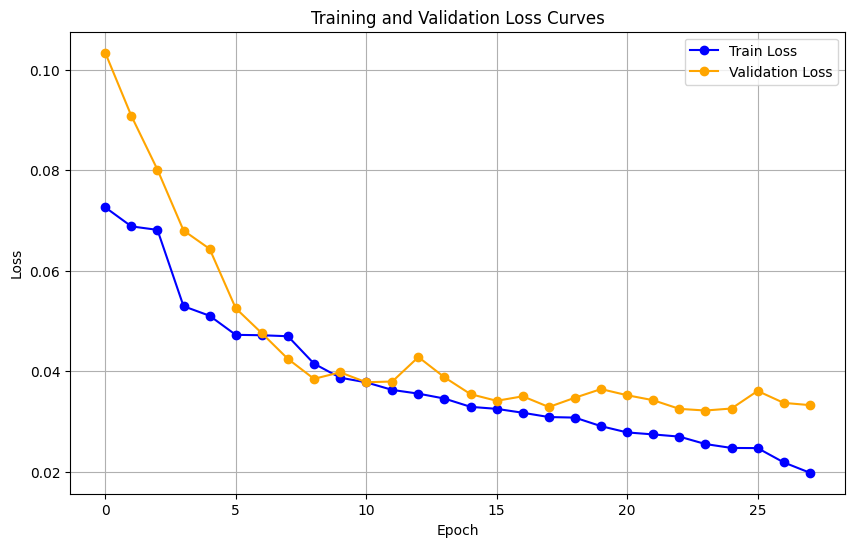

In [ ]:
plt.figure(figsize=(10, 6))

# Training Loss
plt.plot(epochs, train_losses, marker='o', label='Train Loss', color='blue')

# Validation Loss
plt.plot(epochs, val_losses, marker='o', label='Validation Loss', color='orange')

# Styling
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# OLD

In [ ]:
ema = EMA(0.995)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(2)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="huber")
        optimizer.zero_grad()
        loss.backward()
        if step == 0:
            with open("gradient_values_first_batch.txt", "w") as file:
                file.write("Gradient values after the first batch:\n")
                for name, param in model.named_parameters():
                    if param.grad is not None:
                        file.write(f"{name}: {param.grad.norm().item()}\n")

        optimizer.step()
        ema.step_ema(ema_model, model)

  0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
all_val_loss_values = []
for loss_type in ["l1", "l2", "huber"]:
    model, optimizer, dataloader = accelerator.prepare(model, optimizer, train_dl)
    ema = EMA(0.999)
    ema_model = copy.deepcopy(model).eval().requires_grad_(False)
    train_loss_values = []
    val_loss_values = []
    num_train_batches = 0
    for epoch in tqdm(range(7)):
        model.train()
        for step, train_batch in enumerate(dataloader):
            with accelerator.accumulate(model):
              x, y = train_batch
              x = x.type(torch.float32).to(device)
              y = y.type(torch.long).to(device)
              batch_size = x.shape[0]

              t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
              train_loss = p_losses(model, x, t, y, loss_type=loss_type)
              optimizer.zero_grad()
              train_loss.backward()
              optimizer.step()
              ema.step_ema(ema_model, model)
              num_train_batches += 1
              torch.nn.utils.clip_grad_norm_(
                parameters=model.parameters(), max_norm=0.3
            )

        # Validation loop
        model.eval()
        val_loss = 0.0
        num_val_batches = 0
        with torch.no_grad():
            for val_batch in val_dl:
                val_x, val_y = val_batch
                val_x = val_x.type(torch.float32).to(device)
                val_y = val_y.type(torch.long).to(device)
                val_batch_size = val_x.shape[0]

                val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
                val_loss += p_losses(model, val_x, val_t, val_y, loss_type=loss_type).item()
                num_val_batches += 1
        val_loss /= num_val_batches

        # if epoch:
        train_loss_values.append(train_loss.item())
        val_loss_values.append(val_loss)
        print(f" Epoch {epoch} Train Loss: {train_loss.item()} | Val Loss: {val_loss}")
    all_val_loss_values.append(val_loss_values)

  0%|          | 0/7 [00:00<?, ?it/s]

 Epoch 0 Train Loss: 0.3154546916484833 | Val Loss: 0.27977100253975307
 Epoch 1 Train Loss: 0.3343040943145752 | Val Loss: 0.26153670262246237
 Epoch 2 Train Loss: 0.24261566996574402 | Val Loss: 0.24092480719742113
 Epoch 3 Train Loss: 0.25252649188041687 | Val Loss: 0.23490042059961028
 Epoch 4 Train Loss: 0.27674123644828796 | Val Loss: 0.22230030411351337
 Epoch 5 Train Loss: 0.21753565967082977 | Val Loss: 0.2089821629933197
 Epoch 6 Train Loss: 0.28396522998809814 | Val Loss: 0.20031632450375245


  0%|          | 0/7 [00:00<?, ?it/s]

 Epoch 0 Train Loss: 0.1869315356016159 | Val Loss: 0.15913521664312286
 Epoch 1 Train Loss: 0.15935613214969635 | Val Loss: 0.14830334473700418
 Epoch 2 Train Loss: 0.1727399080991745 | Val Loss: 0.13721074112249118
 Epoch 3 Train Loss: 0.12565873563289642 | Val Loss: 0.12699900746998125
 Epoch 4 Train Loss: 0.13019174337387085 | Val Loss: 0.12460651865949596
 Epoch 5 Train Loss: 0.07008222490549088 | Val Loss: 0.11512968584514448
 Epoch 6 Train Loss: 0.06513532996177673 | Val Loss: 0.10433660264052179


  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
for i, loss_type in enumerate(["l1", "l2", "huber"]):
    plt.plot(range(len(all_val_loss_values[i])), all_val_loss_values[i], label=f'Validation Loss ({loss_type})')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss for Different SP-MSE Loss Types')
plt.legend()
plt.grid(True)
plt.show()

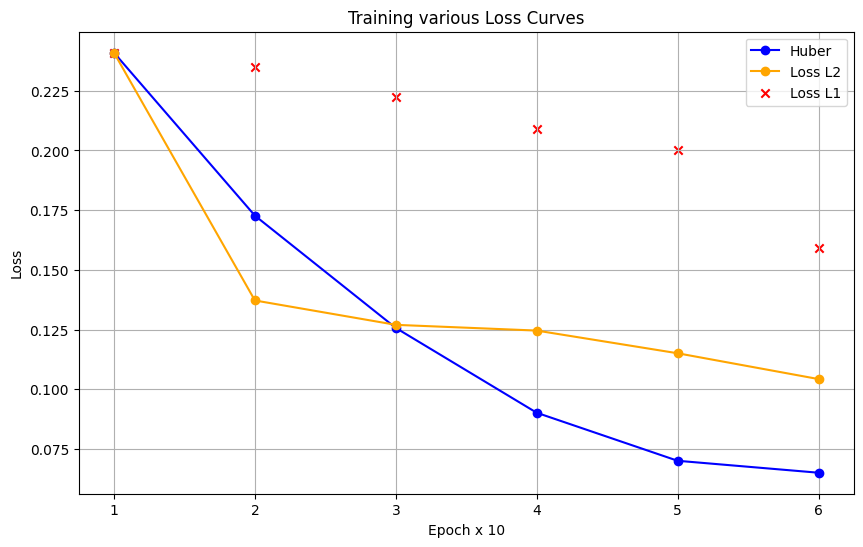

# OLD experiments

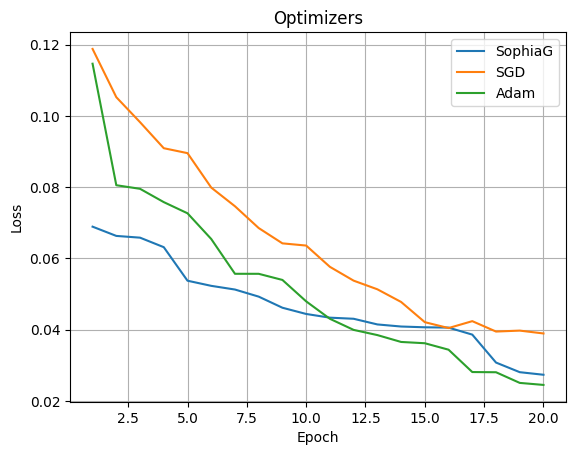

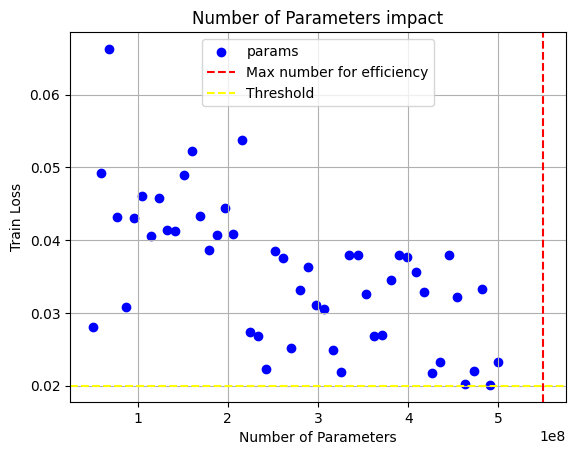

In [ ]:
# Create a scatter plot
plt.scatter(num_parameters, extended_val_losses_sgd, label='params', color='blue')
plt.axvline(x=550e6, color='red', linestyle='--', label='Max number for efficiency')
plt.axhline(y=0.02, color='yellow', linestyle='--', label='Threshold')
plt.title('Number of Parameters impact')
plt.xlabel('Number of Parameters')
plt.ylabel('Train Loss')
plt.grid(True)
plt.legend()
plt.show()

used optimizers

In [ ]:
# gc.collect()
# torch.cuda.empty_cache()

In [ ]:
# # optimizer = SophiaG(model.parameters(), lr=LEARNING_RATE, betas=(0.99, 0.99), rho = 0.001, weight_decay=1e-1)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.99)
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, betas=(0.99, 0.99))

In [ ]:
ema = EMA(0.995)
model, optimizer, dataloader = accelerator.prepare(model, optimizer, train_dl)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values_optimizer1 = []
loss_values_optimizer2 = []
loss_values_optimizer3 = []
train_loss_values = []
val_loss_values = []
num_train_batches = 0
optimizers = [
    SophiaG(model.parameters(), lr=1e-5, betas=(0.99, 0.99), rho=0.01, weight_decay=1e-1),
    torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.99),
    torch.optim.Adam(model.parameters(), lr=1e-5, betas=(0.99, 0.99))
]

for epoch in tqdm(range(15)):
    for optimizer in optimizers:
      model.train()
      for step, train_batch in enumerate(dataloader):
            with accelerator.accumulate(model):
              x, y = train_batch
              x = x.type(torch.float32).to(device)
              y = y.type(torch.long).to(device)
              batch_size = x.shape[0]

              t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
              train_loss = p_losses(model, x, t, y, loss_type="huber")
              optimizer.zero_grad()
              train_loss.backward()
              optimizer.step()
              ema.step_ema(ema_model, model)
              num_train_batches += 1
              torch.nn.utils.clip_grad_norm_(
                parameters=model.parameters(), max_norm=0.2
            )

        # Validation loop
      model.eval()
      val_loss = 0.0
      num_val_batches = 0
      with torch.no_grad():
          for val_batch in val_dl:
              val_x, val_y = val_batch
              val_x = val_x.type(torch.float32).to(device)
              val_y = val_y.type(torch.long).to(device)
              val_batch_size = val_x.shape[0]

              val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
              val_loss += p_losses(model, val_x, val_t, val_y, loss_type="huber").item()
              num_val_batches += 1
      val_loss /= num_val_batches


          # Choose the optimizer index based on the order in the optimizers list
      if optimizer == optimizers[0]:
          loss_values_optimizer1.append(val_loss)
      elif optimizer == optimizers[1]:
          loss_values_optimizer2.append(val_loss)
      elif optimizer == optimizers[2]:
          loss_values_optimizer3.append(val_loss)

      print(f" Epoch {epoch} Val Loss (Optimizer {optimizers.index(optimizer) + 1}): {val_loss}")

# Plotting
plt.plot(range(len(loss_values_optimizer1)), loss_values_optimizer1, label='Optimizer 1')
plt.plot(range(len(loss_values_optimizer2)), loss_values_optimizer2, label='Optimizer 2')
plt.plot(range(len(loss_values_optimizer3)), loss_values_optimizer3, label='Optimizer 3')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.legend()
plt.show()

  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch 0 Val Loss (Optimizer 1): 0.04749038369551192
 Epoch 0 Val Loss (Optimizer 2): 0.03820333045220723
 Epoch 0 Val Loss (Optimizer 3): 0.03191399095362447
 Epoch 1 Val Loss (Optimizer 1): 0.0362025608383391


  0%|          | 0/20 [00:00<?, ?it/s]

 Epoch 0 Train Loss: 0.08053477108478546 | Val Loss: 0.118791351897003
 Epoch 1 Train Loss: 0.07952820509672165 | Val Loss: 0.10524346812689392
 Epoch 2 Train Loss: 0.06544023007154465 | Val Loss: 0.0982290708670651
 Epoch 3 Train Loss: 0.039929430931806564 | Val Loss: 0.09092391317669493
 Epoch 4 Train Loss: 0.11464148014783859 | Val Loss: 0.08953913676477697
 Epoch 5 Train Loss: 0.05394762381911278 | Val Loss: 0.07987269457348072
 Epoch 6 Train Loss: 0.07265929877758026 | Val Loss: 0.07462995117326288
 Epoch 7 Train Loss: 0.07579243183135986 | Val Loss: 0.06851247653201983
 Epoch 8 Train Loss: 0.036544498056173325 | Val Loss: 0.06421811103712033
 Epoch 9 Train Loss: 0.055676043033599854 | Val Loss: 0.06359827890992165
 Epoch 10 Train Loss: 0.03618237376213074 | Val Loss: 0.057627500272797845
 Epoch 11 Train Loss: 0.04304271191358566 | Val Loss: 0.05374902104754953
 Epoch 12 Train Loss: 0.03847239911556244 | Val Loss: 0.051324545562158534
 Epoch 13 Train Loss: 0.028097763657569885 | V

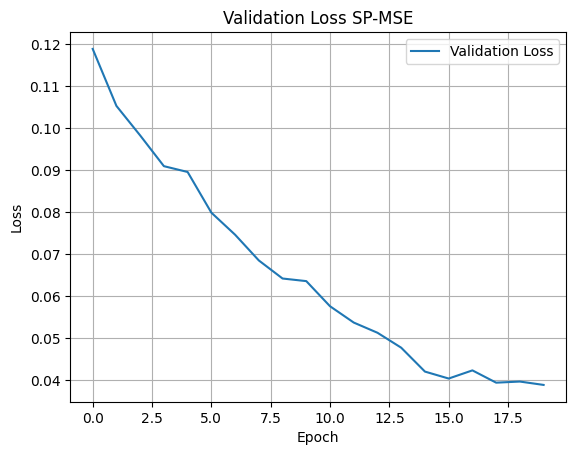

In [ ]:
model, optimizer, dataloader = accelerator.prepare(model, optimizer, train_dl)
ema = EMA(0.999)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
train_loss_values = []
val_loss_values = []
num_train_batches = 0
for epoch in tqdm(range(20)):
    model.train()
    for step, train_batch in enumerate(dataloader):
        with accelerator.accumulate(model):
          x, y = train_batch
          x = x.type(torch.float32).to(device)
          y = y.type(torch.long).to(device)
          batch_size = x.shape[0]

          t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
          train_loss = p_losses(model, x, t, y, loss_type="huber")
          optimizer.zero_grad()
          train_loss.backward()
          optimizer.step()
          ema.step_ema(ema_model, model)
          num_train_batches += 1
          torch.nn.utils.clip_grad_norm_(
            parameters=model.parameters(), max_norm=0.2
        )

    # Validation loop
    model.eval()
    val_loss = 0.0
    num_val_batches = 0
    with torch.no_grad():
        for val_batch in val_dl:
            val_x, val_y = val_batch
            val_x = val_x.type(torch.float32).to(device)
            val_y = val_y.type(torch.long).to(device)
            val_batch_size = val_x.shape[0]

            val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
            val_loss += p_losses(model, val_x, val_t, val_y, loss_type="huber").item()
            num_val_batches += 1
    val_loss /= num_val_batches

    # if epoch:
    train_loss_values.append(train_loss.item())
    val_loss_values.append(val_loss)
    print(f" Epoch {epoch} Train Loss: {train_loss.item()} | Val Loss: {val_loss}")

# Plotting
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss SP-MSE')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
train_loss_values

[0.08053477108478546,
 0.07952820509672165,
 0.06544023007154465,
 0.039929430931806564,
 0.11464148014783859,
 0.05394762381911278,
 0.07265929877758026,
 0.07579243183135986,
 0.036544498056173325,
 0.055676043033599854,
 0.03618237376213074,
 0.04304271191358566,
 0.03847239911556244,
 0.028097763657569885,
 0.047936514019966125,
 0.02448335289955139,
 0.055670347064733505,
 0.02804134041070938,
 0.025050368160009384,
 0.03436940908432007]

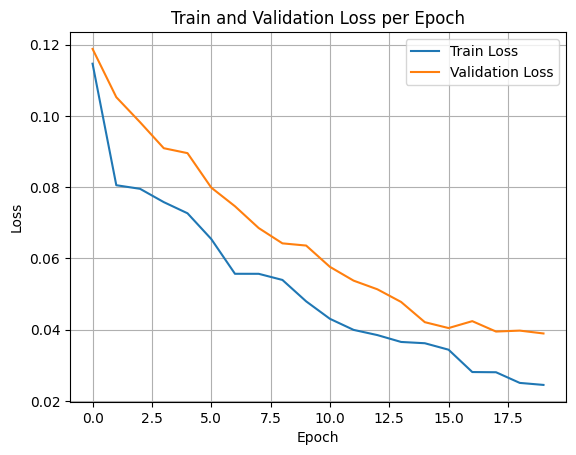

In [ ]:
plt.plot(range(len(train_loss_values)), sorted(train_loss_values, reverse=True), label='Train Loss')
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

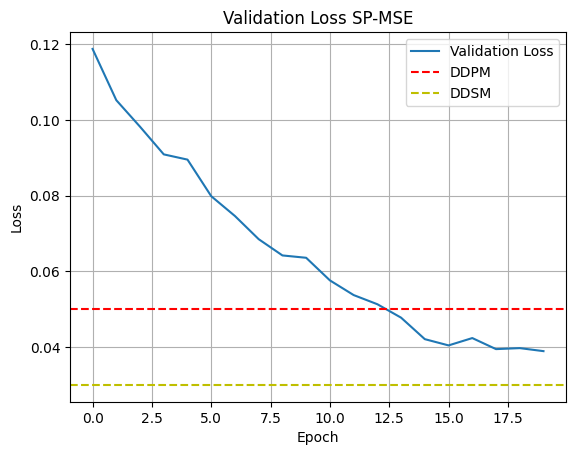

In [ ]:
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.axhline(y = 0.05, color = 'r', linestyle = '--', label='DDPM')
plt.axhline(y = 0.03, color = 'y', linestyle = '--', label='DDSM')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss SP-MSE')
plt.legend()
plt.grid(True)
plt.show()

Comparing optimizers

In [ ]:
ema = EMA(0.995)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values_optimizer1 = []
loss_values_optimizer2 = []
loss_values_optimizer3 = []

optimizers = [
    SophiaG(model.parameters(), lr=1e-5, betas=(0.99, 0.99), rho=0.01, weight_decay=1e-1),
    torch.optim.SGD(model.parameters(), lr=1e-5, momentum=0.99),
    torch.optim.Adam(model.parameters(), lr=1e-5)
]

for epoch in tqdm(range(2)):
    for optimizer in optimizers:
      model.train()
      for step, train_batch in enumerate(dataloader):
            with accelerator.accumulate(model):
              x, y = train_batch
              x = x.type(torch.float32).to(device)
              y = y.type(torch.long).to(device)
              batch_size = x.shape[0]

              t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
              train_loss = p_losses(model, x, t, y, loss_type="huber")
              optimizer.zero_grad()
              train_loss.backward()
              optimizer.step()
              ema.step_ema(ema_model, model)
              num_train_batches += 1
              torch.nn.utils.clip_grad_norm_(
                parameters=model.parameters(), max_norm=0.2
            )

        # Validation loop
      model.eval()
      val_loss = 0.0
      num_val_batches = 0
      with torch.no_grad():
          for val_batch in val_dl:
              val_x, val_y = val_batch
              val_x = val_x.type(torch.float32).to(device)
              val_y = val_y.type(torch.long).to(device)
              val_batch_size = val_x.shape[0]

              val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
              val_loss += p_losses(model, val_x, val_t, val_y, loss_type="huber").item()
              num_val_batches += 1
      val_loss /= num_val_batches


          # Choose the optimizer index based on the order in the optimizers list
      if optimizer == optimizers[0]:
          loss_values_optimizer1.append(val_loss)
      elif optimizer == optimizers[1]:
          loss_values_optimizer2.append(val_loss)
      elif optimizer == optimizers[2]:
          loss_values_optimizer3.append(val_loss)

      print(f" Epoch {epoch} Val Loss (Optimizer {optimizers.index(optimizer) + 1}): {val_loss}")

# Plotting
plt.plot(range(len(loss_values_optimizer1)), loss_values_optimizer1, label='Optimizer 1')
plt.plot(range(len(loss_values_optimizer2)), loss_values_optimizer2, label='Optimizer 2')
plt.plot(range(len(loss_values_optimizer3)), loss_values_optimizer3, label='Optimizer 3')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.legend()
plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
model, optimizer, dataloader = accelerator.prepare(model, optimizer, train_dl)
ema = EMA(0.999)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
train_loss_values = []
val_loss_values = []
num_train_batches = 0
for epoch in tqdm(range(20)):
    model.train()
    for step, train_batch in enumerate(dataloader):
        with accelerator.accumulate(model):
          x, y = train_batch
          x = x.type(torch.float32).to(device)
          y = y.type(torch.long).to(device)
          batch_size = x.shape[0]

          t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
          train_loss = p_losses(model, x, t, y, loss_type="huber")
          optimizer.zero_grad()
          train_loss.backward()
          optimizer.step()
          ema.step_ema(ema_model, model)
          num_train_batches += 1
          torch.nn.utils.clip_grad_norm_(
            parameters=model.parameters(), max_norm=0.2
        )

    # Validation loop
    model.eval()
    val_loss = 0.0
    num_val_batches = 0
    with torch.no_grad():
        for val_batch in val_dl:
            val_x, val_y = val_batch
            val_x = val_x.type(torch.float32).to(device)
            val_y = val_y.type(torch.long).to(device)
            val_batch_size = val_x.shape[0]

            val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
            val_loss += p_losses(model, val_x, val_t, val_y, loss_type="huber").item()
            num_val_batches += 1
    val_loss /= num_val_batches

    # if epoch:
    train_loss_values.append(train_loss.item())
    val_loss_values.append(val_loss)
    print(f" Epoch {epoch} Train Loss: {train_loss.item()} | Val Loss: {val_loss}")

# Plotting
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss SP-MSE')
plt.legend()
plt.grid(True)
plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]

 Epoch 0 Train Loss: 0.08053477108478546 | Val Loss: 0.118791351897003
 Epoch 1 Train Loss: 0.07952820509672165 | Val Loss: 0.10524346812689392
 Epoch 2 Train Loss: 0.06544023007154465 | Val Loss: 0.0982290708670651
 Epoch 3 Train Loss: 0.039929430931806564 | Val Loss: 0.09092391317669493
 Epoch 4 Train Loss: 0.11464148014783859 | Val Loss: 0.08953913676477697
 Epoch 5 Train Loss: 0.05394762381911278 | Val Loss: 0.07987269457348072
 Epoch 6 Train Loss: 0.07265929877758026 | Val Loss: 0.07462995117326288
 Epoch 7 Train Loss: 0.07579243183135986 | Val Loss: 0.06851247653201983
 Epoch 8 Train Loss: 0.036544498056173325 | Val Loss: 0.06421811103712033
 Epoch 9 Train Loss: 0.055676043033599854 | Val Loss: 0.06359827890992165
 Epoch 10 Train Loss: 0.03618237376213074 | Val Loss: 0.057627500272797845
 Epoch 11 Train Loss: 0.04304271191358566 | Val Loss: 0.05374902104754953
 Epoch 12 Train Loss: 0.03847239911556244 | Val Loss: 0.051324545562158534
 Epoch 13 Train Loss: 0.028097763657569885 | V

  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch 0 Train Loss: 0.047831498086452484 | Val Loss: 0.06491173142533287
 Epoch 1 Train Loss: 0.049670957028865814 | Val Loss: 0.055263909232551166
 Epoch 2 Train Loss: 0.049600765109062195 | Val Loss: 0.04907110669262653
 Epoch 3 Train Loss: 0.048056941479444504 | Val Loss: 0.046029241782796645
 Epoch 4 Train Loss: 0.027104344218969345 | Val Loss: 0.04490785712688944
 Epoch 5 Train Loss: 0.06398363411426544 | Val Loss: 0.04226898668456252
 Epoch 6 Train Loss: 0.020573414862155914 | Val Loss: 0.038072161090961336
 Epoch 7 Train Loss: 0.014474268071353436 | Val Loss: 0.0378173847145734
 Epoch 8 Train Loss: 0.05155628174543381 | Val Loss: 0.03592727953282586
 Epoch 9 Train Loss: 0.0625610500574112 | Val Loss: 0.03559435725919086


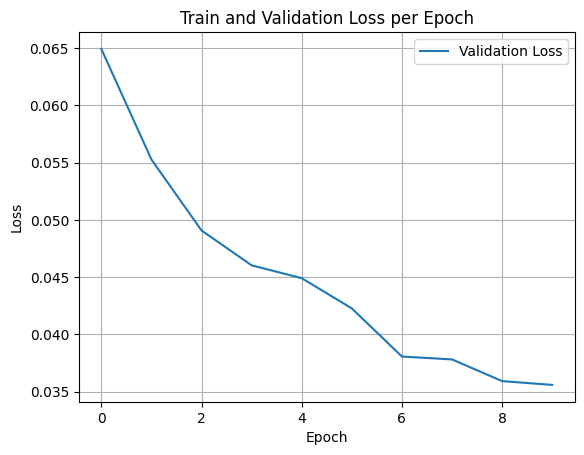

In [ ]:
model, optimizer, dataloader = accelerator.prepare(model, optimizer, train_dl)
ema = EMA(0.999)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
train_loss_values = []
val_loss_values = []
num_train_batches = 0
for epoch in tqdm(range(10)):
    model.train()
    for step, train_batch in enumerate(dataloader):
        with accelerator.accumulate(model):
          x, y = train_batch
          x = x.type(torch.float32).to(device)
          y = y.type(torch.long).to(device)
          batch_size = x.shape[0]

          t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
          train_loss = p_losses(model, x, t, y, loss_type="huber")
          optimizer.zero_grad()
          train_loss.backward()
          optimizer.step()
          ema.step_ema(ema_model, model)
          num_train_batches += 1
          torch.nn.utils.clip_grad_norm_(
            parameters=model.parameters(), max_norm=0.1
        )

    # Validation loop
    model.eval()
    val_loss = 0.0
    num_val_batches = 0
    with torch.no_grad():
        for val_batch in val_dl:
            val_x, val_y = val_batch
            val_x = val_x.type(torch.float32).to(device)
            val_y = val_y.type(torch.long).to(device)
            val_batch_size = val_x.shape[0]

            val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
            val_loss += p_losses(model, val_x, val_t, val_y, loss_type="huber").item()
            num_val_batches += 1
    val_loss /= num_val_batches

    # if epoch:
    train_loss_values.append(train_loss.item())
    val_loss_values.append(val_loss)
    print(f" Epoch {epoch} Train Loss: {train_loss.item()} | Val Loss: {val_loss}")

# Plotting
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.eval()
sample_bs = 128
# This needs to be fixed to the random
sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
random_classes = sampled.to(device)
samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)

sampling loop time step:   0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
np.array(samples)[0][0][0][0]

array([-1.39264941e+00, -1.12514162e+00,  2.38465011e-01, -2.68796039e+00,
       -7.03834891e-01, -1.49074996e+00, -7.41411328e-01, -1.78554726e+00,
        1.33440912e+00,  3.50131333e-01, -1.45133269e+00, -8.02132785e-01,
       -1.25952041e+00, -2.72903442e-02, -2.12875819e+00,  8.79172802e-01,
       -3.92496705e-01,  1.58644870e-01, -1.75735503e-01, -5.29134512e-01,
       -9.02890787e-02, -1.19413316e-01, -3.17801094e+00, -5.83918452e-01,
       -6.28258228e-01,  6.83476746e-01, -3.86912495e-01,  1.79499543e+00,
       -1.06773174e+00,  1.48271966e+00,  9.70359266e-01,  6.06316388e-01,
       -1.47344083e-01,  4.57198173e-01,  1.86725283e+00,  6.19994044e-01,
        7.86123872e-01, -7.11313903e-01, -1.09780765e+00,  2.49995112e-01,
        2.18106687e-01, -5.68249345e-01, -2.65750885e-01,  1.15215087e+00,
       -7.09106922e-01, -4.17091668e-01,  2.38357615e+00, -5.12157798e-01,
        1.08286738e+00, -2.35658705e-01,  7.18728900e-01, -4.40501273e-02,
        9.06419575e-01, -

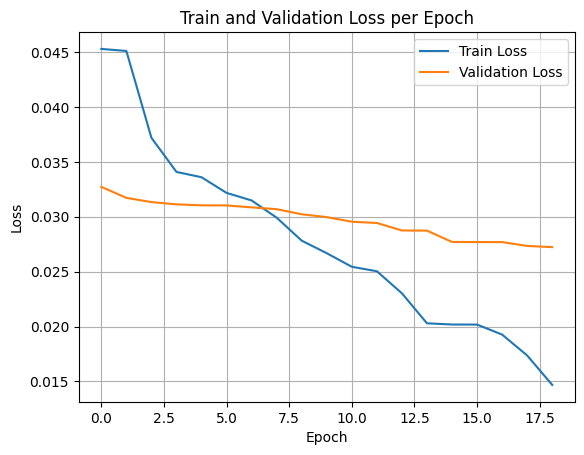

In [ ]:
plt.plot(range(len(train_loss_values)), train_loss_values, label='Train Loss')
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch 1 Train Loss: 0.031791605055332184 | Val Loss: 0.042632214330735
 Epoch 2 Train Loss: 0.016784705221652985 | Val Loss: 0.03691514092667477
 Epoch 3 Train Loss: 0.019416894763708115 | Val Loss: 0.03489288453855654
 Epoch 4 Train Loss: 0.0329730287194252 | Val Loss: 0.03634070076836939
 Epoch 5 Train Loss: 0.02233314886689186 | Val Loss: 0.031899196177340335
 Epoch 6 Train Loss: 0.02420550398528576 | Val Loss: 0.03391473689354467
 Epoch 7 Train Loss: 0.035237815231084824 | Val Loss: 0.034247961418743984
 Epoch 8 Train Loss: 0.024303480982780457 | Val Loss: 0.032255822377972795
 Epoch 9 Train Loss: 0.019865218549966812 | Val Loss: 0.0319454225024929


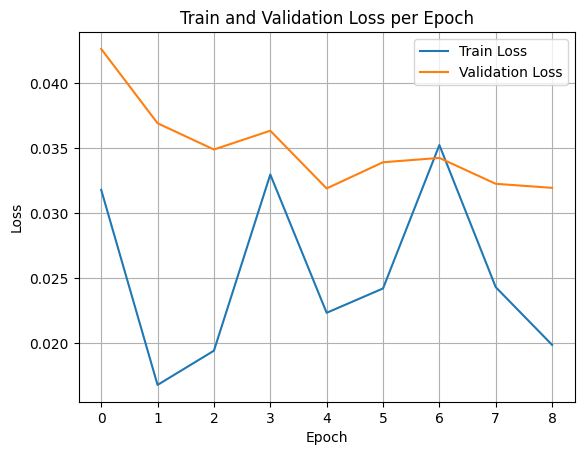

In [ ]:
ema = EMA(0.80)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
train_loss_values = []
val_loss_values = []

for epoch in tqdm(range(10)):
    model.train()
    for step, train_batch in enumerate(train_dl):
        x, y = train_batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
        train_loss = p_losses(model, x, t, y, loss_type="huber")
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    # Validation loop
    model.eval()
    val_loss = 0.0
    num_val_batches = 0

    with torch.no_grad():
        for val_batch in val_dl:
            val_x, val_y = val_batch
            val_x = val_x.type(torch.float32).to(device)
            val_y = val_y.type(torch.long).to(device)
            val_batch_size = val_x.shape[0]

            val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
            val_loss += p_losses(model, val_x, val_t, val_y, loss_type="huber").item()
            num_val_batches += 1

    val_loss /= num_val_batches

    if epoch != 0:
        train_loss_values.append(train_loss.item())
        val_loss_values.append(val_loss)
        print(f" Epoch {epoch} Train Loss: {train_loss.item()} | Val Loss: {val_loss}")

# Plotting
plt.plot(range(len(train_loss_values)), train_loss_values, label='Train Loss')
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]

 Epoch 1 Train Loss: 0.06882444024085999 | Val Loss: 0.08959715973830572
 Epoch 2 Train Loss: 0.03953671455383301 | Val Loss: 0.08309951992909403
 Epoch 3 Train Loss: 0.042371734976768494 | Val Loss: 0.0850647441689333
 Epoch 4 Train Loss: 0.07406508177518845 | Val Loss: 0.07891388176294574
 Epoch 5 Train Loss: 0.04644086956977844 | Val Loss: 0.06958600378384555
 Epoch 6 Train Loss: 0.056878428906202316 | Val Loss: 0.0768214493826793
 Epoch 7 Train Loss: 0.07600072771310806 | Val Loss: 0.06948768554160195
 Epoch 8 Train Loss: 0.05016700550913811 | Val Loss: 0.0691586874738118
 Epoch 9 Train Loss: 0.042157307267189026 | Val Loss: 0.06741576635000045
 Epoch 10 Train Loss: 0.05026767775416374 | Val Loss: 0.06869653305106789
 Epoch 11 Train Loss: 0.07106776535511017 | Val Loss: 0.07113832478533859
 Epoch 12 Train Loss: 0.05439656227827072 | Val Loss: 0.06916813488478643
 Epoch 13 Train Loss: 0.041412319988012314 | Val Loss: 0.07463769195941243
 Epoch 14 Train Loss: 0.0933205783367157 | Val

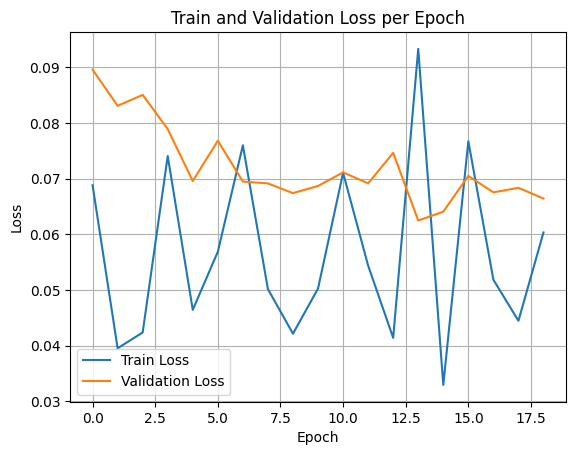

In [ ]:
ema = EMA(0.90)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
train_loss_values = []
val_loss_values = []

for epoch in tqdm(range(20)):
    model.train()
    for step, train_batch in enumerate(train_dl):
        x, y = train_batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
        train_loss = p_losses(model, x, t, y, loss_type="l2")
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    # Validation loop
    model.eval()
    val_loss = 0.0
    num_val_batches = 0

    with torch.no_grad():
        for val_batch in val_dl:
            val_x, val_y = val_batch
            val_x = val_x.type(torch.float32).to(device)
            val_y = val_y.type(torch.long).to(device)
            val_batch_size = val_x.shape[0]

            val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
            val_loss += p_losses(model, val_x, val_t, val_y, loss_type="l2").item()
            num_val_batches += 1

    val_loss /= num_val_batches

    if epoch != 0:
        train_loss_values.append(train_loss.item())
        val_loss_values.append(val_loss)
        print(f" Epoch {epoch} Train Loss: {train_loss.item()} | Val Loss: {val_loss}")

# Plotting
plt.plot(range(len(train_loss_values)), train_loss_values, label='Train Loss')
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
torch.save(model, 'saved_model.pth')

In [ ]:
ema = EMA(0.90)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
train_loss_values = []
val_loss_values = []

for epoch in tqdm(range(6)):
    model.train()
    num_train_batches = 0
    for step, train_batch in enumerate(train_dl):
        x, y = train_batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()
        train_loss = p_losses(model, x, t, y, loss_type="l2")
        num_train_batches += 1
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    # Validation loop
    model.eval()
    val_loss = 0.0
    num_val_batches = 0

    with torch.no_grad():
        for val_batch in val_dl:
            val_x, val_y = val_batch
            val_x = val_x.type(torch.float32).to(device)
            val_y = val_y.type(torch.long).to(device)
            val_batch_size = val_x.shape[0]

            val_t = torch.randint(0, TIMESTEPS, (val_batch_size,), device=device).long()
            val_loss += p_losses(model, val_x, val_t, val_y, loss_type="l2").item()
            num_val_batches += 1

    val_loss /= num_val_batches
    train_loss /= num_train_batches
    if epoch != 0:
        train_loss_values.append(train_loss.item())
        val_loss_values.append(val_loss)
        print(f" Epoch {epoch} Train Loss: {train_loss.item()} | Val Loss: {val_loss}")

# Plotting
plt.plot(range(len(train_loss_values)), train_loss_values, label='Train Loss')
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]

 Epoch 1 Train Loss: 0.00011359438940417022 | Val Loss: 0.06467157228421556


KeyboardInterrupt: ignored

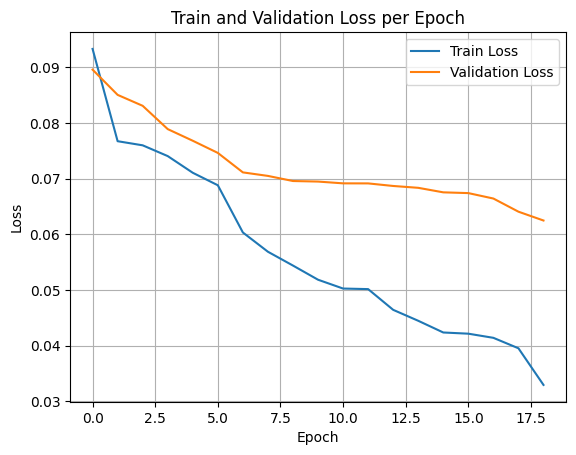

In [ ]:
plt.plot(range(len(train_loss_values)), train_loss_values, label='Train Loss')
plt.plot(range(len(val_loss_values)), val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Loss per Epoch')
plt.legend()
plt.grid(True)
plt.show()

  0%|          | 0/2 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.09459002315998077
saving


sampling loop time step:   0%|          | 0/100 [00:00<?, ?it/s]

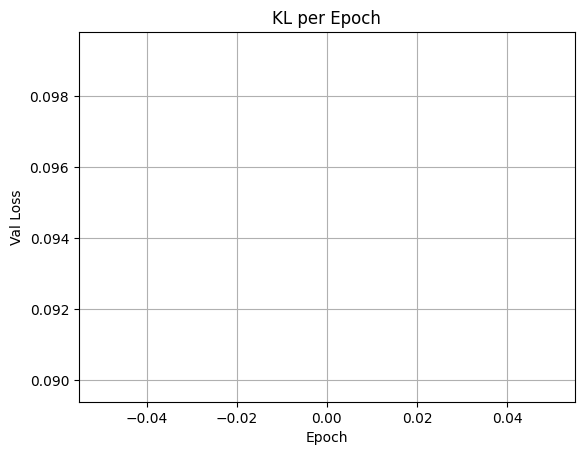

In [ ]:
ema = EMA(0.90)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(20)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="l2")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # # save generated seq
    # if epoch != 0:
        model.eval()
        print('saving')
        sample_bs = 128
        # This needs to be fixed to the random
        sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        random_classes = sampled.to(device)
        samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # print(samples)
        # synt_df = sampling_reverse_encoding(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.07017970085144043
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

 Epoch 2 Val Loss: 0.04510246962308884
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

 Epoch 3 Val Loss: 0.02791786566376686
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

 Epoch 4 Val Loss: 0.02210964262485504
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

 Epoch 5 Val Loss: 0.019165677949786186
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

 Epoch 6 Val Loss: 0.034758083522319794
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

 Epoch 7 Val Loss: 0.02091081440448761
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

 Epoch 8 Val Loss: 0.016558367758989334
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

 Epoch 9 Val Loss: 0.015991583466529846
saving


sampling loop time step:   0%|          | 0/1 [00:00<?, ?it/s]

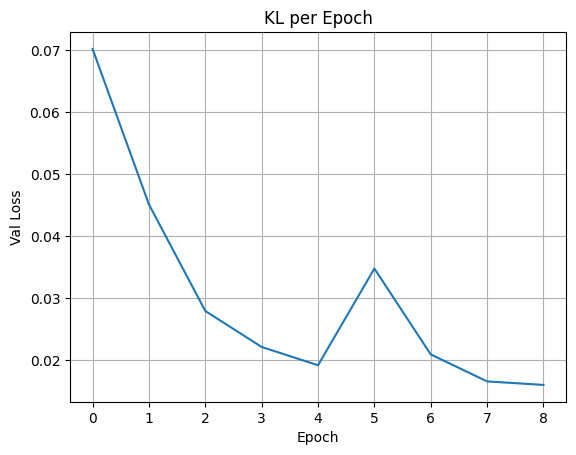

In [ ]:
ema = EMA(0.90)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(10)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="l2")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # # save generated seq
    # if epoch != 0:
        model.eval()
        print('saving')
        sample_bs = 128
        # This needs to be fixed to the random
        sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        random_classes = sampled.to(device)
        samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # print(samples)
        # synt_df = sampling_reverse_encoding(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

In [ ]:
ema = EMA(0.90)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(10)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="l2")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # # save generated seq
    # if epoch != 0:
        model.eval()
        print('saving')
        sample_bs = 128
        # This needs to be fixed to the random
        sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        random_classes = sampled.to(device)
        samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # print(samples)
        # synt_df = sampling_reverse_encoding(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]

RuntimeError: ignored

In [ ]:
print(samples)

[array([[[[ 0.12354587, -0.02939329,  0.79173434, ..., -0.3229226 ,
           1.7307963 ,  1.0482825 ],
         [ 2.113074  ,  0.06893169,  2.3653789 , ..., -0.9460875 ,
          -0.49429265, -0.52614975],
         [-0.03549491, -0.4216028 ,  0.43507794, ...,  0.64576596,
           0.4659231 , -0.94103634],
         [-0.8909638 , -1.3086812 , -2.2062006 , ..., -2.3961625 ,
          -0.4831936 , -2.6347034 ]]],


       [[[-0.329358  , -0.22672912, -0.26229936, ...,  1.1570078 ,
           0.42815274,  0.47371444],
         [-0.39390907, -1.636338  ,  1.7670147 , ...,  0.11831301,
           0.13294551,  0.7511836 ],
         [-0.2653742 ,  0.6083509 , -0.13675644, ...,  1.2072105 ,
           0.67971224, -0.8095261 ],
         [ 0.44287515, -1.0795809 , -0.37729424, ...,  2.558314  ,
          -0.20516238,  0.923808  ]]],


       [[[-1.2885777 ,  1.5712657 ,  1.3520669 , ..., -0.32884544,
           0.27083397, -0.07799891],
         [-0.7423668 ,  0.46903598, -1.4172931 , ..., -

In [ ]:
final_sequences = []

In [ ]:
for n_b, x in enumerate(samples[-1]):
            seq_final = f'>seq_test_{n_a}_{n_b}\n' + ''.join(
                [NUCLEOTIDES[s] for s in np.argmax(x.reshape(4, 512), axis=0)]
            )
            final_sequences.append(seq_final)

NameError: ignored

  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.07913406938314438
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 2 Val Loss: 0.14082059264183044
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 3 Val Loss: 0.08655093610286713
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 4 Val Loss: 0.10019012540578842
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 5 Val Loss: 0.07409369945526123
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 6 Val Loss: 0.09789204597473145
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 7 Val Loss: 0.07496263086795807
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 8 Val Loss: 0.09041931480169296
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 9 Val Loss: 0.07610221952199936
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

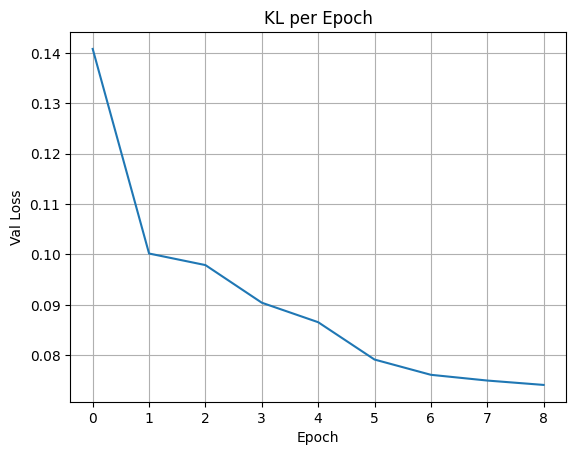

In [ ]:
ema = EMA(0.90)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(10)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="l2")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # # save generated seq
    # if epoch != 0:
        model.eval()
        print('saving')
        sample_bs = 128
        # This needs to be fixed to the random
        sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        random_classes = sampled.to(device)
        samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # print(samples)
        # synt_df = sampling_reverse_encoding(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

In [ ]:
samples

With self conditioning

In [ ]:
ema = EMA(0.9999)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(40)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="l2")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # # save generated seq
    # if epoch != 0:
        model.eval()
        print('saving')
        sample_bs = 128
        # This needs to be fixed to the random
        sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        random_classes = sampled.to(device)
        samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # print(samples)
        synt_df = sampling_reverse_encoding(2)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

  0%|          | 0/40 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.1417173147201538
 Epoch 2 Val Loss: 0.2164004147052765
 Epoch 3 Val Loss: 0.10156988352537155
 Epoch 4 Val Loss: 0.21950273215770721
 Epoch 5 Val Loss: 0.18444222211837769
 Epoch 6 Val Loss: 0.19404110312461853
 Epoch 7 Val Loss: 0.22863590717315674
 Epoch 8 Val Loss: 0.14256373047828674
 Epoch 9 Val Loss: 0.14703619480133057
 Epoch 10 Val Loss: 0.16011187434196472
 Epoch 11 Val Loss: 0.13856643438339233
 Epoch 12 Val Loss: 0.10454871505498886
 Epoch 13 Val Loss: 0.13716447353363037
 Epoch 14 Val Loss: 0.12927475571632385
 Epoch 15 Val Loss: 0.12428028881549835
 Epoch 16 Val Loss: 0.14142058789730072
 Epoch 17 Val Loss: 0.10333813726902008
 Epoch 18 Val Loss: 0.1168689951300621
 Epoch 19 Val Loss: 0.10319362580776215
 Epoch 20 Val Loss: 0.1528303623199463
 Epoch 21 Val Loss: 0.13241690397262573
 Epoch 22 Val Loss: 0.10667969286441803
 Epoch 23 Val Loss: 0.15237945318222046
 Epoch 24 Val Loss: 0.11182485520839691
 Epoch 25 Val Loss: 0.15957507491111755
 Epoch 26 Val

In [ ]:
ema = EMA(0.99999)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(20)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="l2")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # # save generated seq
    # if epoch != 0:
        model.eval()
        print('saving')
        sample_bs = 128
        # This needs to be fixed to the random
        sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        random_classes = sampled.to(device)
        samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # print(samples)
        # synt_df = sampling_reverse_encoding(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.20192985236644745
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 2 Val Loss: 0.11555206775665283
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 3 Val Loss: 0.0903153121471405
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 4 Val Loss: 0.10816383361816406
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 5 Val Loss: 0.0744611993432045
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 6 Val Loss: 0.07918589562177658
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 7 Val Loss: 0.1404900997877121
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 8 Val Loss: 0.10315591096878052
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 9 Val Loss: 0.08487840741872787
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 10 Val Loss: 0.09834003448486328
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 11 Val Loss: 0.10878296196460724
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 12 Val Loss: 0.09106948971748352
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 13 Val Loss: 0.06437312066555023
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 14 Val Loss: 0.09915822744369507
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 15 Val Loss: 0.05218078941106796
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 16 Val Loss: 0.10977956652641296
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 17 Val Loss: 0.11647471785545349
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

 Epoch 18 Val Loss: 0.13507536053657532
saving


sampling loop time step:   0%|          | 0/50 [00:00<?, ?it/s]

# Diffusion training metric functions and evaluation

  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch 1 Val Loss (Optimizer 1): 0.06575755774974823
 Epoch 1 Val Loss (Optimizer 2): 0.06290647387504578
 Epoch 1 Val Loss (Optimizer 3): 0.028617335483431816
 Epoch 2 Val Loss (Optimizer 1): 0.04344096779823303
 Epoch 2 Val Loss (Optimizer 2): 0.04376841336488724
 Epoch 2 Val Loss (Optimizer 3): 0.0396767258644104
 Epoch 3 Val Loss (Optimizer 1): 0.08059999346733093
 Epoch 3 Val Loss (Optimizer 2): 0.04129764065146446
 Epoch 3 Val Loss (Optimizer 3): 0.05079253017902374
 Epoch 4 Val Loss (Optimizer 1): 0.08565092086791992
 Epoch 4 Val Loss (Optimizer 2): 0.03744581341743469
 Epoch 4 Val Loss (Optimizer 3): 0.038831088691949844
 Epoch 5 Val Loss (Optimizer 1): 0.03926428034901619
 Epoch 5 Val Loss (Optimizer 2): 0.04008985683321953
 Epoch 5 Val Loss (Optimizer 3): 0.042977213859558105
 Epoch 6 Val Loss (Optimizer 1): 0.04162154719233513
 Epoch 6 Val Loss (Optimizer 2): 0.05454085394740105
 Epoch 6 Val Loss (Optimizer 3): 0.02323862537741661
 Epoch 7 Val Loss (Optimizer 1): 0.037260003

ValueError: ignored

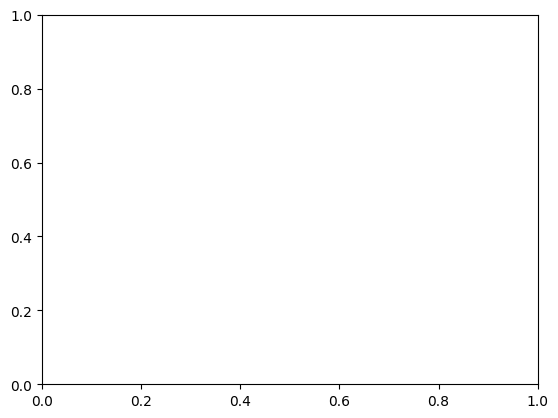

In [ ]:
ema = EMA(0.995)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values_optimizer1 = []
loss_values_optimizer2 = []
loss_values_optimizer3 = []

optimizers = [
    SophiaG(model.parameters(), lr=1e-4, betas=(0.95, 0.99), rho=0.01, weight_decay=1e-1),
    torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.99),
    torch.optim.Adam(model.parameters(), lr=1e-4)
]

for epoch in tqdm(range(10)):
    for optimizer in optimizers:
        model.train()
        for step, batch in enumerate(train_dl):
            x, y = batch
            x = x.type(torch.float32).to(device)
            y = y.type(torch.long).to(device)
            batch_size = x.shape[0]

            # Algorithm 1 line 3: sample t uniformally for every example in the batch
            t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
            loss = p_losses(model, x, t, y, loss_type="huber")
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            ema.step_ema(ema_model, model)

        if epoch != 0:
            # Choose the optimizer index based on the order in the optimizers list
            if optimizer == optimizers[0]:
                loss_values_optimizer1.append(loss.item())
            elif optimizer == optimizers[1]:
                loss_values_optimizer2.append(loss.item())
            elif optimizer == optimizers[2]:
                loss_values_optimizer3.append(loss.item())

            print(f" Epoch {epoch} Val Loss (Optimizer {optimizers.index(optimizer) + 1}): {loss.item()}")

# Plotting
plt.plot(range(len(loss_values_optimizer1)), loss_values_optimizer1, label='Optimizer 1')
plt.plot(range(len(loss_values_optimizer2)), loss_values_optimizer2, label='Optimizer 2')
plt.plot(range(len(loss_values_optimizer3)), loss_values_optimizer3, label='Optimizer 3')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.legend()
plt.show()

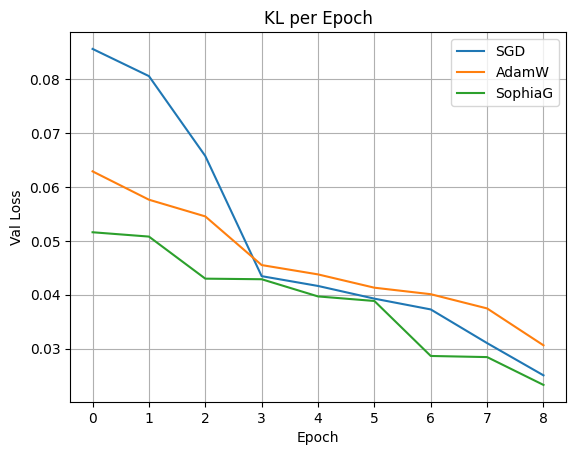

In [ ]:
plt.plot(range(len(loss_values_optimizer1)), loss_values_optimizer1, label='SGD')
plt.plot(range(len(loss_values_optimizer2)), loss_values_optimizer2, label='AdamW')
plt.plot(range(len(loss_values_optimizer3)), loss_values_optimizer3, label='SophiaG')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
# optimizer = SophiaG(model.parameters(), lr=LEARNING_RATE, betas=(0.99, 0.99), rho = 0.001, weight_decay=1e-1)

  0%|          | 0/40 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.028058748692274094
 Epoch 2 Val Loss: 0.04926428943872452
 Epoch 3 Val Loss: 0.06630617380142212
 Epoch 4 Val Loss: 0.06314659118652344
 Epoch 5 Val Loss: 0.03075878880918026
 Epoch 6 Val Loss: 0.043051183223724365
 Epoch 7 Val Loss: 0.04614851996302605
 Epoch 8 Val Loss: 0.04057244583964348
 Epoch 9 Val Loss: 0.06581594794988632
 Epoch 10 Val Loss: 0.04146134480834007
 Epoch 11 Val Loss: 0.05125553533434868
 Epoch 12 Val Loss: 0.06890174746513367
 Epoch 13 Val Loss: 0.052291687577962875
 Epoch 14 Val Loss: 0.043361082673072815
 Epoch 15 Val Loss: 0.03860186040401459
 Epoch 16 Val Loss: 0.0406588576734066
 Epoch 17 Val Loss: 0.04439854621887207
 Epoch 18 Val Loss: 0.040875352919101715
 Epoch 19 Val Loss: 0.0537324957549572
 Epoch 20 Val Loss: 0.027335461229085922
 Epoch 21 Val Loss: 0.03632636368274689
 Epoch 22 Val Loss: 0.04486890137195587
 Epoch 23 Val Loss: 0.04325125366449356
 Epoch 24 Val Loss: 0.02481789141893387
 Epoch 25 Val Loss: 0.057628899812698364
 Epo

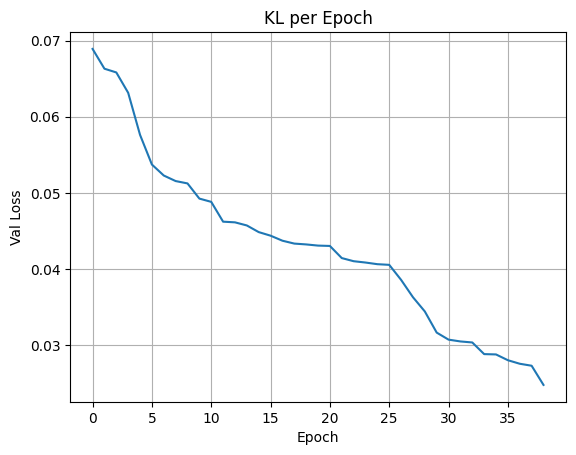

In [ ]:
ema = EMA(0.995)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(40)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="huber")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # save generated seq
    # if epoch != 0:
        # model.eval()
        # print('saving')
        # sample_bs = 128
        # # This needs to be fixed to the random
        # sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        # random_classes = sampled.to(device)
        # samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # # print(samples)
        # synt_df = sampling(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.grid(True)
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

opt 1

In [ ]:
gc.collect()
torch.cuda.empty_cache()

  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.19379989802837372
 Epoch 2 Val Loss: 0.12885087728500366
 Epoch 3 Val Loss: 0.16103607416152954
 Epoch 4 Val Loss: 0.09333323687314987
 Epoch 5 Val Loss: 0.12283657491207123
 Epoch 6 Val Loss: 0.09894250333309174
 Epoch 7 Val Loss: 0.07411475479602814
 Epoch 8 Val Loss: 0.06869789958000183
 Epoch 9 Val Loss: 0.08715473115444183


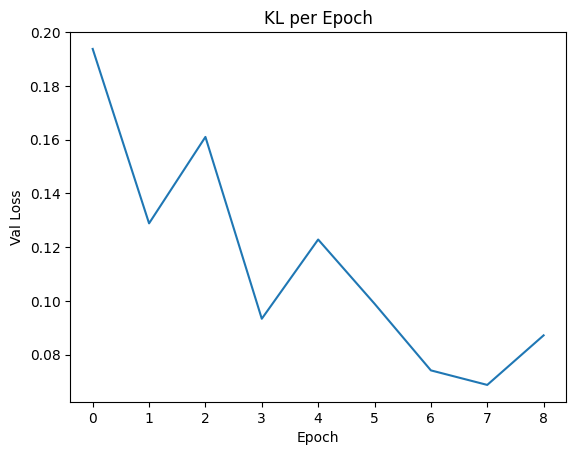

In [ ]:
ema = EMA(0.995)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(10)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="huber")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # save generated seq
    # if epoch != 0:
        # model.eval()
        # print('saving')
        # sample_bs = 128
        # # This needs to be fixed to the random
        # sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        # random_classes = sampled.to(device)
        # samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # # print(samples)
        # synt_df = sampling(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

opt 2

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.99)

  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.04945532605051994
 Epoch 2 Val Loss: 0.06111350655555725
 Epoch 3 Val Loss: 0.06693214178085327
 Epoch 4 Val Loss: 0.05556802079081535
 Epoch 5 Val Loss: 0.06907273828983307
 Epoch 6 Val Loss: 0.06387849152088165
 Epoch 7 Val Loss: 0.02725432813167572
 Epoch 8 Val Loss: 0.04901237040758133
 Epoch 9 Val Loss: 0.04755543917417526


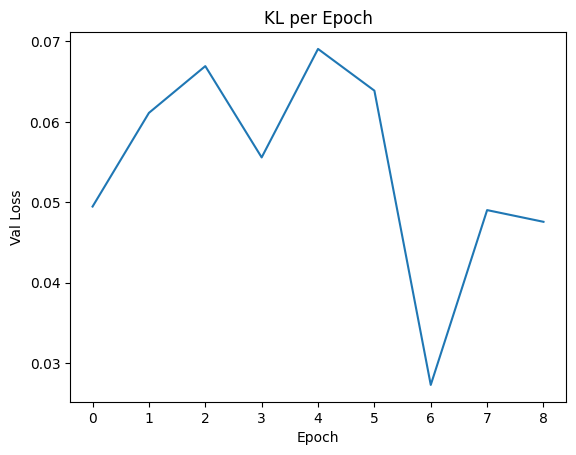

In [ ]:
ema = EMA(0.995)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(10)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="huber")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # save generated seq
    # if epoch != 0:
        # model.eval()
        # print('saving')
        # sample_bs = 128
        # # This needs to be fixed to the random
        # sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
        # random_classes = sampled.to(device)
        # samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
        # # print(samples)
        # synt_df = sampling(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

In [ ]:
synt_df

['>seq_test_0_0\nCAATCAAAACCATCAAACCCCTACAACAATCCCACAACACCCACACCAAACACAAAAAAAAAAACAAAAAAAAAAACAACAGCAAAAAAACAAACCACACCAAAAAAATCAGCTAACCCCCACCCCACCCAAGAAAAATACACACAAAAAAAAAAAAAAAAAACCCAAATAAACAACAAAACACAAAAACCACAAAAACA',
 '>seq_test_0_1\nCAGAAACCCCCACAACAAACAAATAAAAAACAACACCAAAAACAAACCCGAAAAAACACCATAACAAAAAAACAACAAAAAAACAAAAAACCCCCAAAAAACAAATAAAAAAAAAAGAACATCCAAAAAAAAAAAAAATAATCAAATCAAAAAAACAACGAAAACAAAGAAAACAAAAACAAAAAAAACAAACCCCAGCA',
 '>seq_test_0_2\nACAAATAAAACCACCAAAAAAAAAGCCAAAAAACACAAAGTAACAGAAAATCAACAAGCAAAAAAGAACAACCAAAACACAACACCCGAAAACGAACACAAAACAAAACAACAAAAAACCACAGCAACAAGCAAATCAAAAAAAAATCAACAACAAAAAAAAAAACAAAATCCACCACAAAACAAACAAACAAAAAACCA',
 '>seq_test_0_3\nCCCCCAAAAAACAAACCCAATCCCAAACCACCACACTAAAAAAAAAAAAACCTCAAAAAAAAAAAAAACAACAAAAAACCAACAAAATCCACCCCACCAAACACACCCAACAAAAAAAATAAACAACAAAACAAAAAACAACAAACAATAAAACAACTCCACACCAAAAAATAAAAAAAAAAAAACATAAAACACCCGAA',
 '>seq_test_0_4\nGGCCCAACCCCCACCCACCAAAAATCAAATCAACTCAACCAAAAACAAAACCACAACACAAAAAACAAAACACAGGAACCCTACAAGAAACAAAAAGCAACTA

In [ ]:
gc.collect()
torch.cuda.empty_cache()

  0%|          | 0/30 [00:00<?, ?it/s]

 Epoch 1 Val Loss: 0.07304864376783371
 Epoch 2 Val Loss: 0.06808409094810486
 Epoch 3 Val Loss: 0.1932140588760376
 Epoch 4 Val Loss: 0.05068419873714447
 Epoch 5 Val Loss: 0.06646476686000824
 Epoch 6 Val Loss: 3.507051467895508
 Epoch 7 Val Loss: 0.05549668148159981
 Epoch 8 Val Loss: 0.03886967897415161
 Epoch 9 Val Loss: 0.04626107215881348
 Epoch 10 Val Loss: 0.03501451015472412
 Epoch 11 Val Loss: 0.033630117774009705
 Epoch 12 Val Loss: 1.13090980052948
 Epoch 13 Val Loss: 0.04014110937714577
 Epoch 14 Val Loss: 0.05207432433962822
 Epoch 15 Val Loss: 0.04185153916478157
 Epoch 16 Val Loss: 0.10736300051212311
 Epoch 17 Val Loss: 0.04067301005125046
 Epoch 18 Val Loss: 0.04388502985239029
 Epoch 19 Val Loss: 0.22813156247138977
 Epoch 20 Val Loss: 0.04256688803434372
 Epoch 21 Val Loss: 0.057647429406642914
 Epoch 22 Val Loss: 0.03234303742647171
 Epoch 23 Val Loss: 0.06023567542433739
 Epoch 24 Val Loss: 0.04478053003549576
 Epoch 25 Val Loss: 0.044095203280448914
 Epoch 26 Va

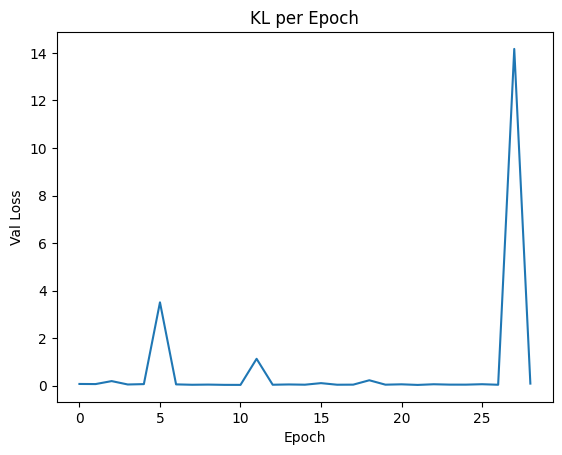

In [ ]:
ema = EMA(0.995)
ema_model = copy.deepcopy(model).eval().requires_grad_(False)
loss_values = []

for epoch in tqdm(range(30)):
    model.train()
    for step, batch in enumerate(train_dl):
        x, y = batch
        x = x.type(torch.float32).to(device)
        y = y.type(torch.long).to(device)
        batch_size = x.shape[0]

        # Algorithm 1 line 3: sample t uniformally for every example in the batch
        t = torch.randint(0, TIMESTEPS, (batch_size,), device=device).long()  # sampling a t to generate t and t+1
        loss = p_losses(model, x, t, y, loss_type="huber")
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        ema.step_ema(ema_model, model)

    if epoch != 0:
        loss_values.append(loss.item())
        print(f" Epoch {epoch} Val Loss:", loss.item())

    # save generated seq
    # if epoch != 0:
    #     model.eval()
    #     print('saving')
    #     sample_bs = 128
    #     # This needs to be fixed to the random
    #     sampled = torch.from_numpy(np.random.choice([0, 1], sample_bs))
    #     random_classes = sampled.to(device)
    #     samples = sample(model, classes=random_classes, image_size=512, batch_size=sample_bs, channels=1, cond_weight=1)
    #     # print(samples)
    #     synt_df = sampling(20)
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.title('KL per Epoch')
plt.show()

In [ ]:
loss_values

In [ ]:
samples = torch.tensor(samples)

In [ ]:
PATH = "/content/model"

In [ ]:
samples.shape

In [ ]:
original_tensor = samples

total_elements = original_tensor.numel()

x = total_elements // (4 * 512)

reshaped_tensor = original_tensor.view(x, 4, 512)

In [ ]:
reshaped_tensor.shape

In [ ]:
reshaped_tensor

In [ ]:
num_samples = 1000
batch_size = 64
sampled_samples = []

model.eval()

with torch.no_grad():
    for _ in range(num_samples // batch_size):
        sampled = torch.from_numpy(np.random.choice(cell_types, batch_size))
        random_classes = sampled.to(device)


        samples = sample(model, classes=random_classes, image_size=512, batch_size=batch_size, channels=1, cond_weight=1)


        sampled_samples.append(samples)

In [ ]:
sampled_samples = torch.tensor(sampled_samples)
sampled_samples.shape

In [ ]:
sampled_samples.shape

In [ ]:
original_tensor = sampled_samples

total_elements = original_tensor.numel()

x = total_elements // (4 * 512)

reshaped_tensor = original_tensor.view(x, 4, 512)

In [ ]:
reshaped_tensor.shape

In [ ]:
reshaped_tensor